In [26]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline 

In [2]:
df_pro = pd.read_csv('data/df_melted_fullymined_pro.csv', sep='|')
df_avg = pd.read_csv('data/df_melted_fullymined_avg.csv', sep='|')

df_pro.head()

Unnamed: 0    match_id                  timestamp player_number  \
0           0  5860242034  2022-05-07 13:30:38+00:00       player1   
1           1  5860157180  2022-05-07 12:53:17+00:00       player1   
2           2  5860193059  2022-05-07 12:28:32+00:00       player1   
3           3  5860101282  2022-05-07 11:56:54+00:00       player1   
4           4  5857587216  2022-05-05 18:52:11+00:00       player1   

                                        player_puuid     rank  
0  Enn_3VvikuDftsgroni-2b7bOtX7dNNG5PcRxXSMJFXZLP...   Master  
1  0dzqDyAd3j7-v5dm7uqQTYMYPUXIshFVnc7w5p9QGWxnU5...  Diamond  
2  HHIn3MsOsdbqZpxwkhOPUk9JNJu6_GBPoTLkFuZTgIuBhs...  Unknown  
3  NtaeqFFIGCpibRu4nrmXmih6yJ2hBGkNyF6sf7QBBtTXlf...   Master  
4  Kmtv1nNQhRKyXV-FqDIBEIO1WhPA5LPOjAvsnRldYlQcXv...  Unknown

In [3]:
df_avg.head()

Unnamed: 0    match_id                  timestamp player_number  \
0           0  5857231455  2022-05-05 13:18:51+00:00       player1   
1           1  5857099343  2022-05-05 12:47:24+00:00       player1   
2           2  5856620450  2022-05-04 23:45:01+00:00       player1   
3           3  5856716446  2022-05-04 23:09:33+00:00       player1   
4           4  5855943984  2022-05-04 18:04:03+00:00       player1   

                                        player_puuid    rank  
0  ATaIws30cj0UfWN179fxT95zfYUrAAWNPhJHRh6h8_IIYR...    Gold  
1  qxzKB-XDos1g8BVytNYaxzC5QvaXnJ2FHPkMtv0rWG_wmv...    Gold  
2  YEFUr568ruap9KJSRAeT29Fkb34anUma7sX9OeYRxs0-Pi...  Bronze  
3  NFuiAvF0C9YMCBBfgJpDYAaaZqS8IFhnKX5_02QBeZIREl...    Gold  
4  J87wGe7JHWF07jC521xbEiFuRnHFqC5NPbwM_IUEjOgfzj...  Silver

In [4]:
df_pro = df_pro.drop(df_pro.loc[df_pro['match_id'] == 0].index)
df_pro = df_pro.sort_values(by="match_id", ascending=False)
df_pro.head()

Unnamed: 0    match_id                  timestamp player_number  \
54530      227390  5861230888  2022-05-08 05:21:39+00:00       player6   
83323      340886  5861230849  2022-05-08 05:20:31+00:00       player9   
18120       75181  5861230849  2022-05-08 05:20:31+00:00       player2   
36619      151356  5861220802  2022-05-08 05:11:46+00:00       player4   
92446      378963  5861220802  2022-05-08 05:11:46+00:00      player10   

                                            player_puuid     rank  
54530  bb69hqwLSgyw18SNTPGwvvxiP1VsmwLt2-Z0blZFqFyEm9...  Diamond  
83323  iE5Ti1uxe2_IBokmfL05ucXVtCAbTuRv08r57gCABeKxnE...  Diamond  
18120  FREwOnvAvoqHLkYFEPcRWlaYLbfw93yvfIZlKbMDm-WULA...   Master  
36619  uH9fb6m4E009clzZE_syjeIQbjj31WTQwcXFh6oxwjYYXV...   Master  
92446  2JvtNf8r_CJTF8ZxmEn52oMHRY299wW0V8cBOEbyF5b6dt...   Master

In [5]:
df_avg = df_avg.drop(df_avg.loc[df_avg['match_id'] == 0].index)
df_avg = df_avg.sort_values(by="match_id", ascending=False)
df_avg.head()

Unnamed: 0    match_id                  timestamp player_number  \
34231      269854  5862952319  2022-05-09 01:08:00+00:00       player8   
34232      269855  5862941025  2022-05-09 00:33:45+00:00       player8   
21416      167761  5862940607  2022-05-09 00:23:06+00:00       player5   
29688      234717  5862881213  2022-05-09 00:11:09+00:00       player7   
42709      334562  5862881148  2022-05-09 00:08:19+00:00      player10   

                                            player_puuid    rank  
34231  SeWZVYMlCzHjZ7IUmnL6irG2N1hPkaLcJBbfFYFTj3Arwi...    Gold  
34232  SeWZVYMlCzHjZ7IUmnL6irG2N1hPkaLcJBbfFYFTj3Arwi...    Gold  
21416  mChsGwlG_Y_YEJVBUnvMDi8d2yLzYqiDXJgqxriv8hmHYe...  Silver  
29688  lAtGQsIhWn4W99hR02JfW9DtLNqRqyxYTD4IASCxrD-sOF...    Gold  
42709  Bm7V3t_9Op4YJ3xOTQD2EzobAZe_dz41xL16XYMQKkGc01...  Bronze

In [6]:
import datetime
df_pro['timestamp'] = pd.to_datetime(df_pro['timestamp'] )
df_pro['timestamp'] = df_pro.timestamp.values.astype('datetime64[D]')

df_avg['timestamp'] = pd.to_datetime(df_avg['timestamp'] )
df_avg['timestamp'] = df_avg.timestamp.values.astype('datetime64[D]')

In [7]:
times_per_day_pro = df_pro.groupby('timestamp').size()
times_per_day_avg = df_avg.groupby('timestamp').size()
print("Pro:\n" + str(times_per_day_pro) + "\n")
print("Avg:\n" + str(times_per_day_avg))

Pro:
timestamp
2021-06-23        1
2021-06-24        3
2021-06-25        1
2021-06-28        4
2021-06-29        1
              ...  
2022-05-04     9836
2022-05-05    13861
2022-05-06    16679
2022-05-07    15666
2022-05-08      810
Length: 118, dtype: int64

Avg:
timestamp
2021-02-19       2
2021-02-20       1
2021-08-26       2
2021-09-13       8
2021-09-14       4
              ... 
2022-05-05    5737
2022-05-06    7121
2022-05-07    8868
2022-05-08    6756
2022-05-09       6
Length: 142, dtype: int64


In [8]:
print("Pro:\n" + str(times_per_day_pro.describe()) + "\n")
print("Pro:\n" + str(times_per_day_avg.describe()))

Pro:
count      118.000000
mean       784.169492
std       2735.858141
min          1.000000
25%          3.000000
50%         16.500000
75%        103.000000
max      16679.000000
dtype: float64

Pro:
count     142.000000
mean      303.753521
std      1246.192119
min         1.000000
25%         3.000000
50%         8.000000
75%        22.750000
max      8868.000000
dtype: float64


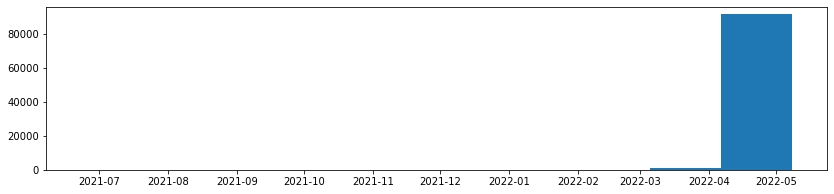

In [9]:
plt.figure(figsize=(14, 3))

plt.hist(df_pro['timestamp'])
plt.show()

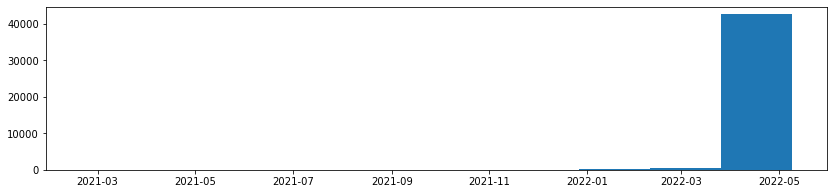

In [10]:
plt.figure(figsize=(14, 3))

plt.hist(df_avg['timestamp'])
plt.show()

Filter only behaviour in the last 30 days

In [11]:
df_filtered_last_30_days_pro = times_per_day_pro.tail(30)
df_filtered_last_30_days_avg = times_per_day_avg.tail(30)

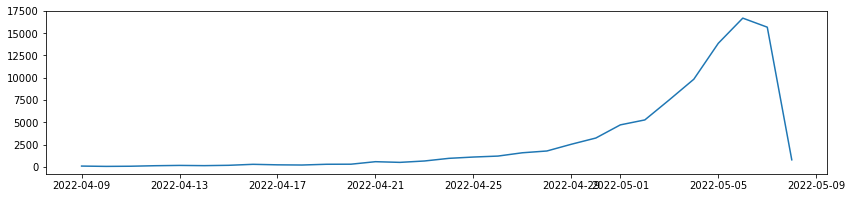

In [12]:
plt.figure(figsize=(14, 3))

plt.plot(df_filtered_last_30_days_pro.index, df_filtered_last_30_days_pro)
plt.show()

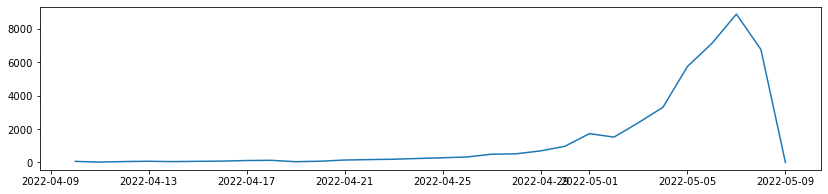

In [13]:
plt.figure(figsize=(14, 3))

plt.plot(df_filtered_last_30_days_avg.index, df_filtered_last_30_days_avg)
plt.show()

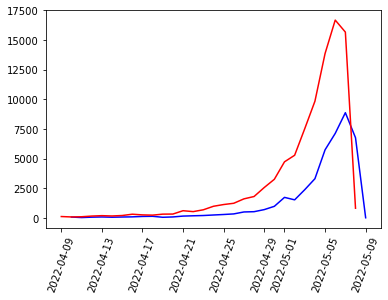

In [14]:
#plt.figure(figsize=(14, 3))

plt.plot(df_filtered_last_30_days_avg.index, df_filtered_last_30_days_avg, color="blue")
plt.plot(df_filtered_last_30_days_pro.index, df_filtered_last_30_days_pro, color="red")
plt.xticks(rotation=70)
plt.show()

In [15]:
sum_avg = df_filtered_last_30_days_avg.sum()
df_normalized_last_30_days_avg = df_filtered_last_30_days_avg.apply(lambda x: x / sum_avg)

sum_pro = df_filtered_last_30_days_pro.sum()
df_normalized_last_30_days_pro = df_filtered_last_30_days_pro.apply(lambda x: x / sum_pro)

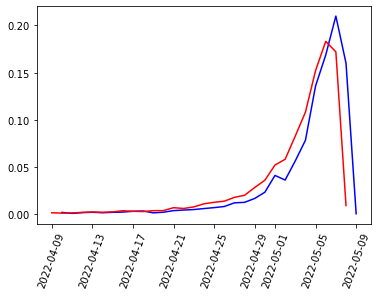

In [16]:
plt.plot(df_normalized_last_30_days_avg.index, df_normalized_last_30_days_avg, color="blue")
plt.plot(df_normalized_last_30_days_pro.index, df_normalized_last_30_days_pro, color="red")
plt.xticks(rotation=70)
plt.show()

In [17]:
# group pro players
pro_players = df_pro.groupby('player_puuid').count().sort_values(by="match_id", ascending=False)
pro_players.head(10)

Unnamed: 0  match_id  \
player_puuid                                                               
OlfQQY21G1tZpUE9h3gCHFkTb3EaveilTZ-n84Zqpqr1dKU...         109       109   
KfBXKOZniCk-jvU7NkeUucrVmb5NHaE5hUmbBlyUNnl7s2u...          98        98   
Rn9Fh8trA945xpD-2X-rOrfzqmnm5tGHhtzNCBWJJ63HOOd...          96        96   
7roh5IjEuc1eGUFyq3cA2fZCm-bvL4QgZizCCzWrg_OD3GK...          94        94   
oRNqUl1ldmfd6Ntp8LJX6hUitRU233KM1U7GGuR2SuMVzSZ...          93        93   
BMztWzgrDKWeoKlaiZQuSkYO6G7ZiiKiEeWnkZfflb-F0Nl...          90        90   
kXUUwgnsuOKgUDoA6RGpuGTsaYrjw1J9h3enm4OAJgCHr7G...          89        89   
O1XIC_et3nD66iZkhhst6tZEq7F7px0FyI46woQytKRiH6Q...          88        88   
T_qCUTboIZV00ufO2mo_aDY0o-C8TKGpu1hd9aYRIoj48_y...          88        88   
I9AyfD7n7XOQJmqtOUSSwtniP5mtO04of5tpGkVvc1dKHPk...          87        87   

                                                    timestamp  player_number  \
player_puuid                                                                   
OlfQQY21G1tZpUE9h3gCHFkTb3EaveilTZ-n84Zqpqr1dKU...        109            109   
KfBXKOZniCk-jvU7NkeUucrVmb5NHaE5hUmbBlyUNnl7s2u...         98             98   
Rn9Fh8trA945xpD-2X-rOrfzqmnm5tGHhtzNCBWJJ63HOOd...         96             96   
7roh5IjEuc1eGUFyq3cA2fZCm-bvL4QgZizCCzWrg_OD3GK...         94             94   
oRNqUl1ldmfd6Ntp8LJX6hUitRU233KM1U7GGuR2SuMVzSZ...         93             93   
BMztWzgrDKWeoKlaiZQuSkYO6G7ZiiKiEeWnkZfflb-F0Nl...         90             90   
kXUUwgnsuOKgUDoA6RGpuGTsaYrjw1J9h3enm4OAJgCHr7G...         89             89   
O1XIC_et3nD66iZkhhst6tZEq7F7px0FyI46woQytKRiH6Q...         88             88   
T_qCUTboIZV00ufO2mo_aDY0o-C8TKGpu1hd9aYRIoj48_y...         88             88   
I9AyfD7n7XOQJmqtOUSSwtniP5mtO04of5tpGkVvc1dKHPk...         87             87   

                                                    rank  
player_puuid                                              
OlfQQY21G1tZpUE9h3gCHFkTb3EaveilTZ-n84Zqpqr1dKU...   109  
KfBXKOZniCk-jvU7NkeUucrVmb5NHaE5hUmbBlyUNnl7s2u...    98  
Rn9Fh8trA945xpD-2X-rOrfzqmnm5tGHhtzNCBWJJ63HOOd...    96  
7roh5IjEuc1eGUFyq3cA2fZCm-bvL4QgZizCCzWrg_OD3GK...    94  
oRNqUl1ldmfd6Ntp8LJX6hUitRU233KM1U7GGuR2SuMVzSZ...    93  
BMztWzgrDKWeoKlaiZQuSkYO6G7ZiiKiEeWnkZfflb-F0Nl...    90  
kXUUwgnsuOKgUDoA6RGpuGTsaYrjw1J9h3enm4OAJgCHr7G...    89  
O1XIC_et3nD66iZkhhst6tZEq7F7px0FyI46woQytKRiH6Q...    88  
T_qCUTboIZV00ufO2mo_aDY0o-C8TKGpu1hd9aYRIoj48_y...    88  
I9AyfD7n7XOQJmqtOUSSwtniP5mtO04of5tpGkVvc1dKHPk...    87

In [18]:
# group avg players
avg_players = df_avg.groupby('player_puuid').count().sort_values(by="match_id", ascending=False)
avg_players.head(10)

Unnamed: 0  match_id  \
player_puuid                                                               
jue-VFnXs4CIrR0kAfkU3dd8voN7im5Z7nJprRX-ELuJJH3...         116       116   
Pw-AbG57uGiQMeY_iruMPD0-yPHwROb2psMzbXRr2MD0AeU...          50        50   
7QH_oy2UfTbdRd_m2pqvoavAUvoklbuVR1Ci6Evy0vddFjr...          43        43   
nb-FzQonN7h4F57M76x6u60GbDv30oLn_dgnpdSTrbGAZG1...          43        43   
9p_Gq0exfqaHHMASrEXI-cyJFI8Y_airjbjjIQe5kka0LSA...          42        42   
H19z4g7A1DWs_sX4IdnV2M-IcLcmkG2rvQD_rv77KxNYeHr...          41        41   
EiPNZrAyONRWRJp5ARdJucRoqiwCM-XRa7slL2-qssyN6c3...          40        40   
7QmWKa6H0r1SvlWHMhQmwssI0ILAdJk0vPODKVYUPT7MBFy...          40        40   
D7ocQZhs7cKnSlWhrfnUZlHlC_iaie2zmgBP58TVVaJz0A0...          40        40   
7AkLeYPuQbrqmFTXHkEOVEAOFmq7OUfVrKxoknr6NCnAFcj...          39        39   

                                                    timestamp  player_number  \
player_puuid                                                                   
jue-VFnXs4CIrR0kAfkU3dd8voN7im5Z7nJprRX-ELuJJH3...        116            116   
Pw-AbG57uGiQMeY_iruMPD0-yPHwROb2psMzbXRr2MD0AeU...         50             50   
7QH_oy2UfTbdRd_m2pqvoavAUvoklbuVR1Ci6Evy0vddFjr...         43             43   
nb-FzQonN7h4F57M76x6u60GbDv30oLn_dgnpdSTrbGAZG1...         43             43   
9p_Gq0exfqaHHMASrEXI-cyJFI8Y_airjbjjIQe5kka0LSA...         42             42   
H19z4g7A1DWs_sX4IdnV2M-IcLcmkG2rvQD_rv77KxNYeHr...         41             41   
EiPNZrAyONRWRJp5ARdJucRoqiwCM-XRa7slL2-qssyN6c3...         40             40   
7QmWKa6H0r1SvlWHMhQmwssI0ILAdJk0vPODKVYUPT7MBFy...         40             40   
D7ocQZhs7cKnSlWhrfnUZlHlC_iaie2zmgBP58TVVaJz0A0...         40             40   
7AkLeYPuQbrqmFTXHkEOVEAOFmq7OUfVrKxoknr6NCnAFcj...         39             39   

                                                    rank  
player_puuid                                              
jue-VFnXs4CIrR0kAfkU3dd8voN7im5Z7nJprRX-ELuJJH3...   116  
Pw-AbG57uGiQMeY_iruMPD0-yPHwROb2psMzbXRr2MD0AeU...    50  
7QH_oy2UfTbdRd_m2pqvoavAUvoklbuVR1Ci6Evy0vddFjr...    43  
nb-FzQonN7h4F57M76x6u60GbDv30oLn_dgnpdSTrbGAZG1...    43  
9p_Gq0exfqaHHMASrEXI-cyJFI8Y_airjbjjIQe5kka0LSA...    42  
H19z4g7A1DWs_sX4IdnV2M-IcLcmkG2rvQD_rv77KxNYeHr...    41  
EiPNZrAyONRWRJp5ARdJucRoqiwCM-XRa7slL2-qssyN6c3...    40  
7QmWKa6H0r1SvlWHMhQmwssI0ILAdJk0vPODKVYUPT7MBFy...    40  
D7ocQZhs7cKnSlWhrfnUZlHlC_iaie2zmgBP58TVVaJz0A0...    40  
7AkLeYPuQbrqmFTXHkEOVEAOFmq7OUfVrKxoknr6NCnAFcj...    39

Building the graphs from the files might take quite a bit of time (see alternative below):

In [19]:
G_pro = nx.Graph()
G_avg = nx.Graph()

for id in df_pro["match_id"].drop_duplicates():
    df_pro_id = df_pro[df_pro["match_id"] == id]
    
    for index_i, row_i in df_pro_id.iterrows():
        for index_j, row_j in df_pro_id.iterrows():
            if index_i != index_j:
                node_i = row_i["player_puuid"]
                node_j = row_j["player_puuid"]
                
                if(node_i is not None and node_j is not None and node_i != node_j):
                    if(G_pro.has_edge(node_i, node_j)):
                        G_pro[node_i][node_j]["weight"] = G_pro[node_i][node_j]["weight"] + 1
                    else:
                        G_pro.add_edge(node_i, node_j, weight=1)
                        
for node in G_pro.nodes:
    G_pro.nodes[node]['rank']= df_pro[df_pro["player_puuid"] == node]["rank"].iloc[0]

for id in df_avg["match_id"].drop_duplicates():
    df_avg_id = df_avg[df_avg["match_id"] == id]
    
    for index_i, row_i in df_avg_id.iterrows():
        for index_j, row_j in df_avg_id.iterrows():
            if index_i != index_j:
                node_i = row_i["player_puuid"]
                node_j = row_j["player_puuid"]
                
                if(node_i is not None and node_j is not None and node_i != node_j):
                    if(G_avg.has_edge(node_i, node_j)):
                        G_avg[node_i][node_j]["weight"] = G_avg[node_i][node_j]["weight"] + 1
                    else:
                        G_avg.add_edge(node_i, node_j, weight=1)
                        
for node in G_avg.nodes:
    G_avg.nodes[node]['rank']= df_avg[df_avg["player_puuid"] == node]["rank"].iloc[0]

In [83]:
nx.write_gpickle(G_pro, "data/G_pro.gpickle")
nx.write_gpickle(G_avg, "data/G_avg.gpickle")

Alternatively the graph can be imported:

In [84]:
G_pro = nx.read_gpickle("data/G_pro.gpickle")
G_avg = nx.read_gpickle("data/G_avg.gpickle")

In [20]:
print("The graph of pro players has " + str(len(G_pro.nodes)) + " nodes(players) and " + str(len(G_pro.edges)) + " edges.")
print(nx.info(G_pro))

print("The graph of average players has " + str(len(G_avg.nodes)) + " nodes(players) and " + str(len(G_avg.edges)) + " edges.")
print(nx.info(G_avg))

The graph of pro players has 3044 nodes(players) and 114808 edges.
Graph with 3044 nodes and 114808 edges
The graph of average players has 1978 nodes(players) and 12072 edges.
Graph with 1978 nodes and 12072 edges


C:\Users\Admin\AppData\Local\Temp\ipykernel_1576\2142681607.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G_pro))
C:\Users\Admin\AppData\Local\Temp\ipykernel_1576\2142681607.py:5: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G_avg))


In [21]:
edge_weight_pro = 0
for edge in G_pro.edges(data='weight'):
    edge_weight_pro += edge[2]
edge_weight_pro /= len(G_pro.edges)
    
edge_weight_avg = 0
for edge in G_avg.edges(data='weight'):
    edge_weight_avg += edge[2]
edge_weight_avg /= len(G_avg.edges)
    
print("Average edge weight for pro players: " + str(edge_weight_pro))
print("Average edge weight for average players: " + str(edge_weight_avg))

Average edge weight for pro players: 2.2341126053933524
Average edge weight for average players: 3.1966534128561963


In [22]:
import random

random.seed(41)

def remove_nodes_from_graph(percentage_removing_nodes, G):

    new_G = nx.Graph(G)

    num_to_remove = int(len(new_G) * percentage_removing_nodes)
    nodes = random.sample(list(new_G.nodes), num_to_remove)
    new_G.remove_nodes_from(nodes)

    # remove low-degree nodes
    low_degree = [n for n, d in new_G.degree(weight="weight") if d < 10]
    new_G.remove_nodes_from(low_degree)

    return new_G

In [23]:
from random import sample

new_G_pro = remove_nodes_from_graph(0.7, G_pro)
new_G_avg = remove_nodes_from_graph(0.55, G_avg)

# largest connected component
components = nx.connected_components(new_G_pro)
largest_component = max(components, key=len)
H_pro = new_G_pro.subgraph(largest_component)

components = nx.connected_components(new_G_avg)
largest_component = max(components, key=len)
H_avg = new_G_avg.subgraph(largest_component)

# compute centrality
centrality_pro = nx.betweenness_centrality(H_pro, k=10, endpoints=True, weight="weight")
centrality_avg = nx.betweenness_centrality(H_avg, k=10, endpoints=True, weight="weight")

# compute community structure
lpc = nx.community.label_propagation_communities(H_pro)
community_index_pro = {n: i for i, com in enumerate(lpc) for n in com}

lpc = nx.community.label_propagation_communities(H_avg)
community_index_avg = {n: i for i, com in enumerate(lpc) for n in com}

Drawing the graphs can take a while, alteratively see image files in img folder:

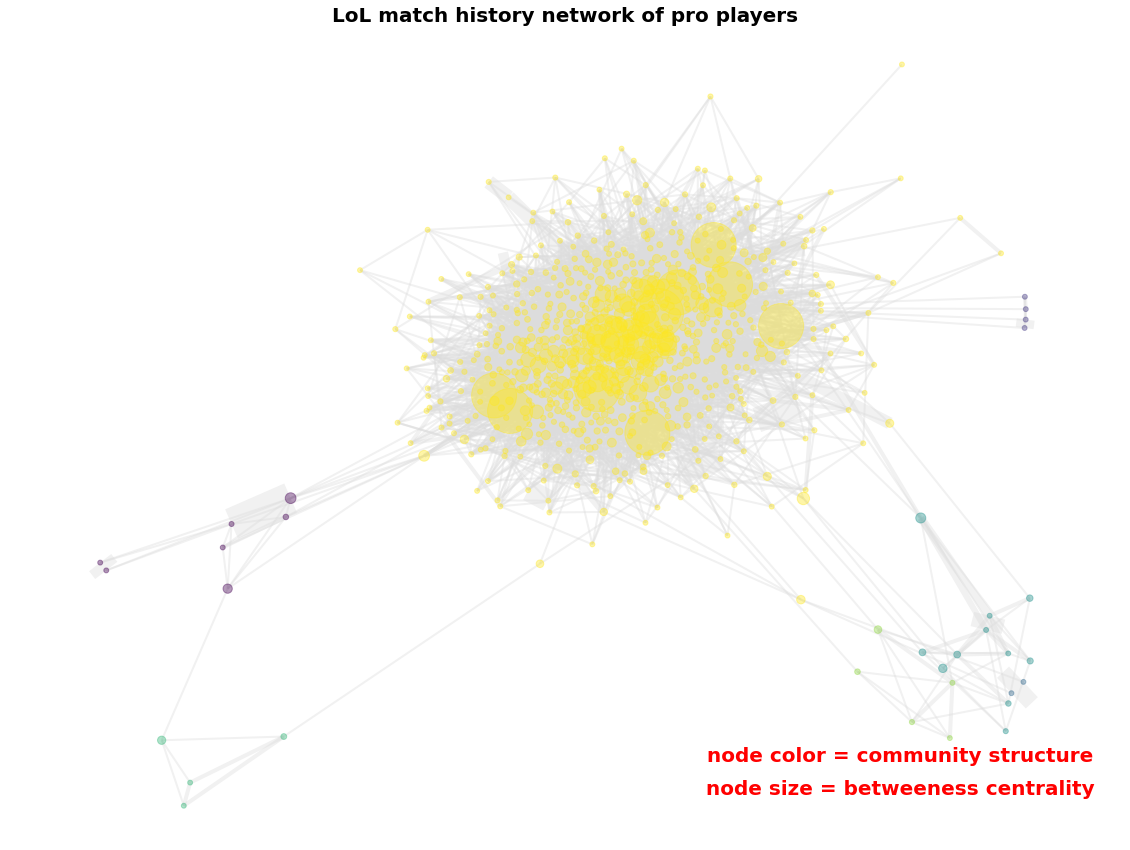

In [89]:
#### draw pro graph ####
fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.spring_layout(H_pro, k=0.15, seed=4572321)
node_color = [community_index_pro[n] for n in H_pro]
node_size = [v * 20000 for v in centrality_pro.values()]
nx.draw_networkx_nodes(
    H_pro,
    pos=pos,
    node_color=node_color,
    node_size=node_size,
    alpha=0.4,
)

for edge in H_pro.edges(data='weight'):
    nx.draw_networkx_edges(
        H_pro,
        pos=pos,
        edgelist=[edge],
        width=edge[2],
        edge_color="gainsboro",
        alpha=0.4,
    )

# Title/legend
font = {"color": "k", "fontweight": "bold", "fontsize": 20}
ax.set_title("LoL match history network of pro players", font)
# Change font color for legend
font["color"] = "r"

ax.text(
    0.80,
    0.10,
    "node color = community structure",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
ax.text(
    0.80,
    0.06,
    "node size = betweeness centrality",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

# Resize figure for label readibility
ax.margins(0.1, 0.05)
#fig.tight_layout()
plt.axis("off")
plt.savefig("img/graph_sampled_pro_players.png")
plt.show()

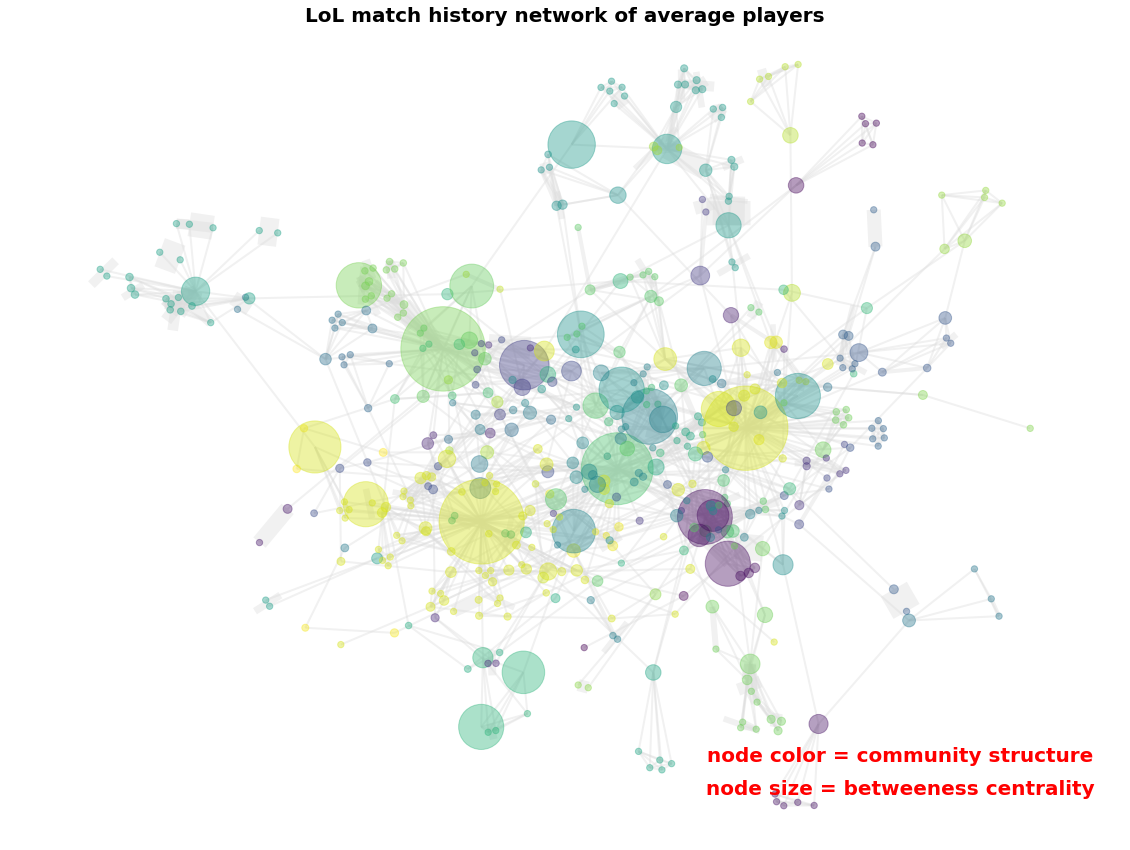

In [90]:
#### draw avg graph ####
fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.spring_layout(H_avg, k=0.15, seed=4572321)
node_color = [community_index_avg[n] for n in H_avg]
node_size = [v * 20000 for v in centrality_avg.values()]
nx.draw_networkx_nodes(
    H_avg,
    pos=pos,
    node_color=node_color,
    node_size=node_size,
    alpha=0.4,
)

for edge in H_avg.edges(data='weight'):
    nx.draw_networkx_edges(
        H_avg,
        pos=pos,
        edgelist=[edge],
        width=edge[2],
        edge_color="gainsboro",
        alpha=0.4,
    )

# Title/legend
font = {"color": "k", "fontweight": "bold", "fontsize": 20}
ax.set_title("LoL match history network of average players", font)
# Change font color for legend
font["color"] = "r"

ax.text(
    0.80,
    0.10,
    "node color = community structure",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
ax.text(
    0.80,
    0.06,
    "node size = betweeness centrality",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

# Resize figure for label readibility
ax.margins(0.1, 0.05)
#fig.tight_layout()
plt.axis("off")
plt.savefig("img/graph_sampled_avg_players.png")
plt.show()

#### Same graphs again with colors showing difference in rank
The higher the rank the more the colors go into the colors to the right of the rainbow (from red over green to blue).

In [24]:
rank_lookup = {"Unknown": 0, "Iron": 1, "Bronze": 2, "Silver": 3, "Gold": 4,
               "Platinum": 5, "Diamond": 6, "Master": 7, "GrandMaster": 8, "Challenger": 9}

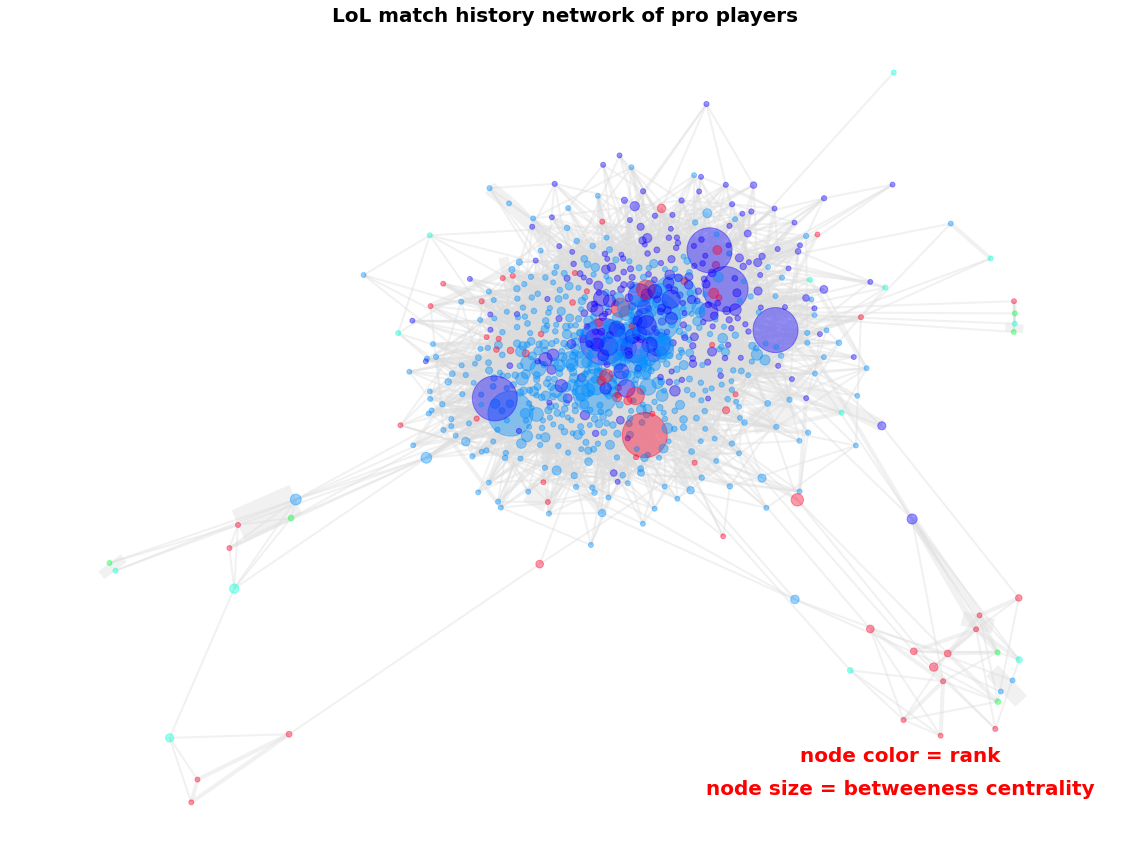

In [27]:
#### draw pro rank graph ####
fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.spring_layout(H_pro, k=0.15, seed=4572321)
norm = mpl.colors.Normalize(vmin=0, vmax=9, clip=True)
ranks = dict()
for i in H_pro.nodes(data="rank"):
    ranks[i[0]] = rank_lookup[i[1]]
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.gist_rainbow)
node_color = [mapper.to_rgba(ranks[i]) for i in ranks]
node_size = [v * 20000 for v in centrality_pro.values()]
nx.draw_networkx_nodes(
    H_pro,
    pos=pos,
    node_color=node_color,
    node_size=node_size,
    alpha=0.4,
)

for edge in H_pro.edges(data='weight'):
    nx.draw_networkx_edges(
        H_pro,
        pos=pos,
        edgelist=[edge],
        width=edge[2],
        edge_color="gainsboro",
        alpha=0.4,
    )

# Title/legend
font = {"color": "k", "fontweight": "bold", "fontsize": 20}
ax.set_title("LoL match history network of pro players", font)
# Change font color for legend
font["color"] = "r"

ax.text(
    0.80,
    0.10,
    "node color = rank",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
ax.text(
    0.80,
    0.06,
    "node size = betweeness centrality",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

# Resize figure for label readibility
ax.margins(0.1, 0.05)
#fig.tight_layout()
plt.axis("off")
plt.savefig("img/graph_sampled_pro_players_rank.png")
plt.show()

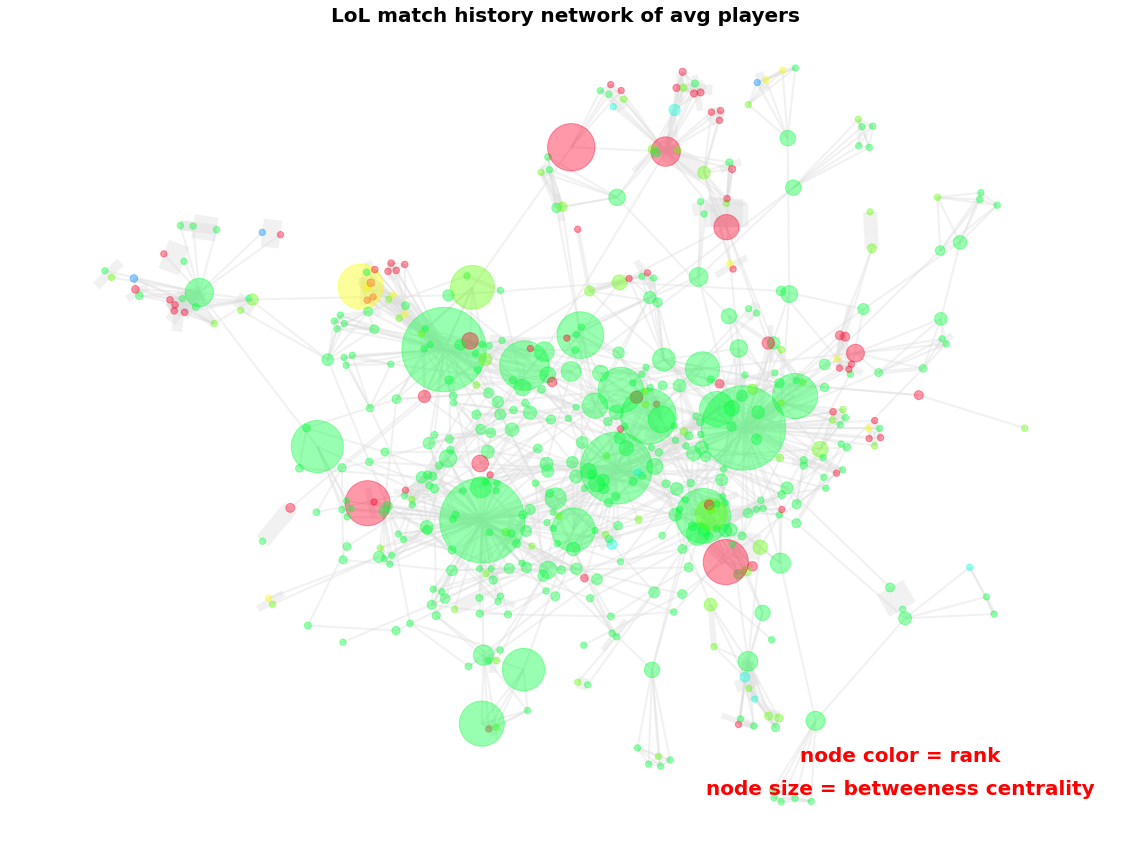

In [28]:
#### draw avg rank graph ####
fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.spring_layout(H_avg, k=0.15, seed=4572321)
norm = mpl.colors.Normalize(vmin=0, vmax=9, clip=True)
ranks = dict()
for i in H_avg.nodes(data="rank"):
    ranks[i[0]] = rank_lookup[i[1]]
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.gist_rainbow)
node_color = [mapper.to_rgba(ranks[i]) for i in ranks]
node_size = [v * 20000 for v in centrality_avg.values()]
nx.draw_networkx_nodes(
    H_avg,
    pos=pos,
    node_color=node_color,
    node_size=node_size,
    alpha=0.4,
)

for edge in H_avg.edges(data='weight'):
    nx.draw_networkx_edges(
        H_avg,
        pos=pos,
        edgelist=[edge],
        width=edge[2],
        edge_color="gainsboro",
        alpha=0.4,
    )

# Title/legend
font = {"color": "k", "fontweight": "bold", "fontsize": 20}
ax.set_title("LoL match history network of avg players", font)
# Change font color for legend
font["color"] = "r"

ax.text(
    0.80,
    0.10,
    "node color = rank",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
ax.text(
    0.80,
    0.06,
    "node size = betweeness centrality",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

# Resize figure for label readibility
ax.margins(0.1, 0.05)
#fig.tight_layout()
plt.axis("off")
plt.savefig("img/graph_sampled_avg_players_rank.png")
plt.show()

# Basic Network Analysis: 
Degree distribution, average clustering coefficient, diameter and centrality.
## Pro players

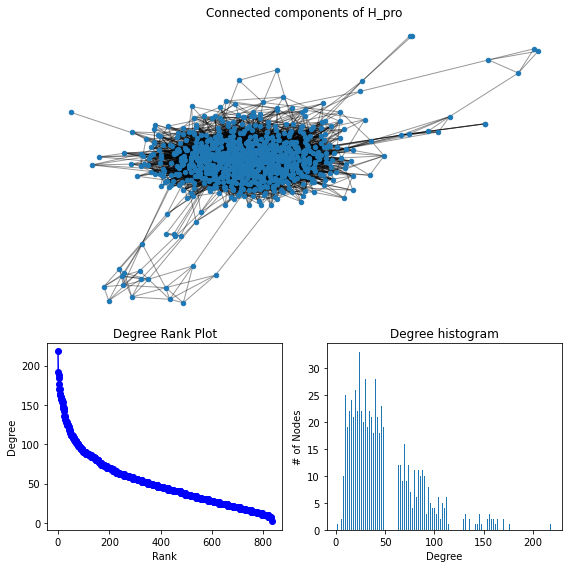

In [91]:
import numpy as np
degree_sequence = sorted((d for n, d in H_pro.degree(weight="weight")), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of H_pro", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = H_pro.subgraph(sorted(nx.connected_components(H_pro), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of H_pro")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

Text(0, 0.5, 'Frequency')

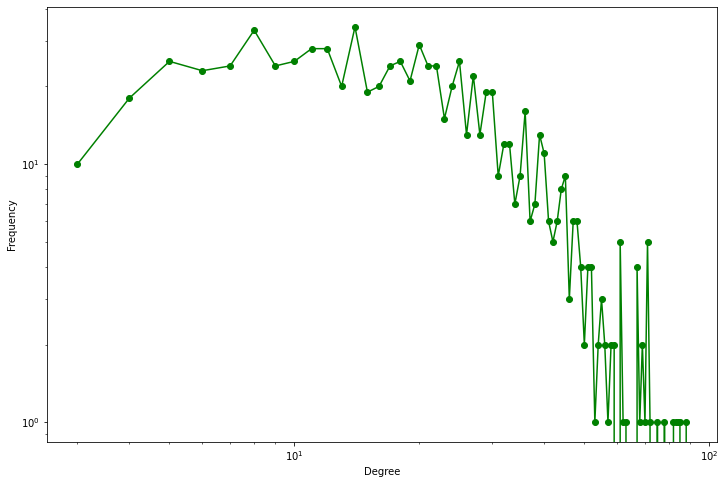

In [92]:
degree_freq = nx.degree_histogram(H_pro)
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(degrees[3:], degree_freq[3:],'go-') 
plt.xlabel('Degree')
plt.ylabel('Frequency')

that most nodes have degrees between 1 and 100. This indicate that
professional players play with more different players during their games.

Centrality

In [93]:
degree_centrality_dict_pro = dict(sorted(H_pro.degree(weight="weight"), key=lambda x: x[1], reverse=True))
degree_centrality_dict_pro

{'7roh5IjEuc1eGUFyq3cA2fZCm-bvL4QgZizCCzWrg_OD3GKo5Afx0yyoHMpD97d-KSFZtP51gb9eCA': 218,
 'T_qCUTboIZV00ufO2mo_aDY0o-C8TKGpu1hd9aYRIoj48_yPfG_Ragyv7kVDk5-YJePMo0taMEHBEA': 192,
 'L5pS_brtV6RNmtAHYVdlrpVr8U6y64qd-3BSpVUywkghq9Z5VJCueDpT6zrrTeYoYgKmFU0ihfEhrg': 188,
 'r3H3NPmuiDrhwTSIR9ywyM7c-wPhKC4xpFMyv8TyxGUezNWGttg3ZTWFr5dwhQHpd6SZb7lEFKi5UA': 184,
 'LIBCMgDhWOEbV47L52kzH-fDlJGJHm9QnsD3rjgAYD94RUJ7oMvNQvuzg0_eyf7OqTsa73cPg9KE2w': 176,
 'BUmF0AlmReYrcdWMXQBH_mdLWG5_FPn67ks-OV7iTwP14mRchIz_e51tudI_eLxQXx907M0X0hBHMw': 170,
 '0rnpnnkNLkLF3xxkdriT7c-iDIUKddrTxIk03bscf3kPf-s63BOdJaslRjc0ue-1Nmd403SNsIY6uw': 170,
 'aB7UFyCJj9nXGltSJxNEeWWMtGWW8Pja4VIcjKKFsMe94gqH0hr4OD-IWtcICj9_JFjrAb5k-lf3Xg': 164,
 'RBbKZteqM-PWHzgiakNYiLPBrHOjxqBxljkQTy_9mCB6n28HJDtex1eJNLBSYmEBSAm4J9ypykomWw': 164,
 'bBGlHmI5CCLspbWI_hpPIU7JiArTXp-btbmRis6h9vusmwtSpyhA1Sx9fMXt-gFza_4kvwYtCF0aQQ': 162,
 '3Xwz-ZmgyVr7QMstLjrP2enBBxxppHwVVT5VFfgC7AxNkDPT8M3ziZ1TvpFRd8P6WzOGYrmVyrZtIQ': 160,
 'oCCLeU0RYvuFLf9X6gxT9_aMiYwQaI

The top three players with the most matching players in the network graph are:
* 7roh5IjEuc1eGUFyq3cA2fZCm-bvL4QgZizCCzWrg_OD3GKo5Afx0yyoHMpD97dKSFZtP51gb9eCA': 218,
* 'T_qCUTboIZV00ufO2mo_aDY0o-C8TKGpu1hd9aYRIoj48_yPfG_Ragyv7kVDk5YJePMo0taMEHBEA': 192,
* 'L5pS_brtV6RNmtAHYVdlrpVr8U6y64qd3BSpVUywkghq9Z5VJCueDpT6zrrTeYoYgKmFU0ihfEhrg': 188,

In [94]:
def div_d(my_dict, G):

    v = len(G.nodes)-1
    for i in my_dict:
        my_dict[i] = float(my_dict[i]/v)

    return my_dict

In [96]:
degree_centrality_normalized_pro = div_d(degree_centrality_dict_pro, H_pro)
degree_centrality_normalized_pro = dict(sorted(degree_centrality_normalized_pro.items(),key = lambda x:x[1],reverse = True))
degree_centrality_normalized_pro

{'7roh5IjEuc1eGUFyq3cA2fZCm-bvL4QgZizCCzWrg_OD3GKo5Afx0yyoHMpD97d-KSFZtP51gb9eCA': 0.00031492696005917163,
 'T_qCUTboIZV00ufO2mo_aDY0o-C8TKGpu1hd9aYRIoj48_yPfG_Ragyv7kVDk5-YJePMo0taMEHBEA': 0.00027736686390532545,
 'L5pS_brtV6RNmtAHYVdlrpVr8U6y64qd-3BSpVUywkghq9Z5VJCueDpT6zrrTeYoYgKmFU0ihfEhrg': 0.0002715883875739645,
 'r3H3NPmuiDrhwTSIR9ywyM7c-wPhKC4xpFMyv8TyxGUezNWGttg3ZTWFr5dwhQHpd6SZb7lEFKi5UA': 0.00026580991124260355,
 'LIBCMgDhWOEbV47L52kzH-fDlJGJHm9QnsD3rjgAYD94RUJ7oMvNQvuzg0_eyf7OqTsa73cPg9KE2w': 0.00025425295857988165,
 'BUmF0AlmReYrcdWMXQBH_mdLWG5_FPn67ks-OV7iTwP14mRchIz_e51tudI_eLxQXx907M0X0hBHMw': 0.00024558524408284024,
 '0rnpnnkNLkLF3xxkdriT7c-iDIUKddrTxIk03bscf3kPf-s63BOdJaslRjc0ue-1Nmd403SNsIY6uw': 0.00024558524408284024,
 'aB7UFyCJj9nXGltSJxNEeWWMtGWW8Pja4VIcjKKFsMe94gqH0hr4OD-IWtcICj9_JFjrAb5k-lf3Xg': 0.0002369175295857988,
 'RBbKZteqM-PWHzgiakNYiLPBrHOjxqBxljkQTy_9mCB6n28HJDtex1eJNLBSYmEBSAm4J9ypykomWw': 0.0002369175295857988,
 'bBGlHmI5CCLspbWI_hpPIU7JiArTXp-btbmRis

In the pro_network the top three players who with a wide range of game friends (very connected individuals)are listed
* 7roh5IjEuc1eGUFyq3cA2fZCm-bvL4QgZizCCzWrg_OD3GKo5Afx0yyoHMpD97d-KSFZtP51gb9eCA': 0.00031492696005917163,
* T_qCUTboIZV00ufO2mo_aDY0o-C8TKGpu1hd9aYRIoj48_yPfG_Ragyv7kVDk5-YJePMo0taMEHBEA': 0.00027736686390532545,
* L5pS_brtV6RNmtAHYVdlrpVr8U6y64qd-3BSpVUywkghq9Z5VJCueDpT6zrrTeYoYgKmFU0ihfEhrg': 0.0002715883875739645,

In [49]:
distance_dict = {(e1, e2): 1 / weight for e1, e2, weight in H_pro.edges(data='weight')}
nx.set_edge_attributes(H_pro, distance_dict, 'distance')

close_centrality = nx.closeness_centrality(H_pro, distance="distance")

dict2_sorted_values = sorted(close_centrality.items(),key = lambda x:x[1],reverse = True)
print(dict2_sorted_values)

[('7roh5IjEuc1eGUFyq3cA2fZCm-bvL4QgZizCCzWrg_OD3GKo5Afx0yyoHMpD97d-KSFZtP51gb9eCA', 1.2500888592494142), ('LIBCMgDhWOEbV47L52kzH-fDlJGJHm9QnsD3rjgAYD94RUJ7oMvNQvuzg0_eyf7OqTsa73cPg9KE2w', 1.2038431882000893), ('xP9lfeCdaHs4aDWgbR7DO8ieglM-rh35g3o2SlT18e9KtbIrkxgZf6wwPB9Dlv6W6oObxqDXH9z4QA', 1.1955189809756606), ('A7ab1DgOTt_4AenR6uWjMH78HTSeHnqWS1snN-iOyExYdRl4SBeNY1lrQdq-AnJv0pL7oa8pIjekPA', 1.1910065841808166), ('3Xwz-ZmgyVr7QMstLjrP2enBBxxppHwVVT5VFfgC7AxNkDPT8M3ziZ1TvpFRd8P6WzOGYrmVyrZtIQ', 1.18228058886941), ('L5pS_brtV6RNmtAHYVdlrpVr8U6y64qd-3BSpVUywkghq9Z5VJCueDpT6zrrTeYoYgKmFU0ihfEhrg', 1.175721352840356), ('2W8TMrBhxBoPtnQQi02HK4Ooo8JV4Njv7qY0AseO0xPQZDn5PYV7o0O5QctK5U4Cpk2lR5RNcp1AqA', 1.1740751997798704), ('r3H3NPmuiDrhwTSIR9ywyM7c-wPhKC4xpFMyv8TyxGUezNWGttg3ZTWFr5dwhQHpd6SZb7lEFKi5UA', 1.1721175654800045), ('udCix2syqKkF1NKujcmOAhnjrQtmPm7kwnKlWahdVZvv89xf15D6aaee09CP6OxxK-GYKP6Ka6Qlcw', 1.1696288837330895), ('MY-cjzqiiktK5v4AN0dBkcE00h_exInXeOIKJ39pbA-_P61hlVm-raS5-3REoGov

In the pro_player network, the top 3 players who are good ‘broadcasters are listed:
* '7roh5IjEuc1eGUFyq3cA2fZCm-bvL4QgZizCCzWrg_OD3GKo5Afx0yyoHMpD97d-KSFZtP51gb9eCA', 1.2500888592494142), 
* ('LIBCMgDhWOEbV47L52kzH-fDlJGJHm9QnsD3rjgAYD94RUJ7oMvNQvuzg0_eyf7OqTsa73cPg9KE2w', 1.2038431882000893), 
* ('xP9lfeCdaHs4aDWgbR7DO8ieglM-rh35g3o2SlT18e9KtbIrkxgZf6wwPB9Dlv6W6oObxqDXH9z4QA', 1.1955189809756606), 

In [107]:
bet_centrality = nx.betweenness_centrality(H_pro, normalized = True, 
                                              endpoints = False, weight="weight") 

In [108]:
dict3_sorted_values = sorted(bet_centrality.items(),key = lambda x:x[1],reverse = True)
print(dict2_sorted_values)

[('RNIXKeefHuGwElNgr5ix84yLiTDTAAG0vM4pEzriwK8G1lrtlOJ4e98BpWfYSXC1ufRhnPY9MIq-9w', 0.7870527927811048), ('P1_Ijm9F7MFfitF6k0xJMOZc3TY5P-LSVsm1qgnOoHiQLc54X_xduvruevhA7B1oyZ2O903ichxcJA', 0.779747081918935), ('MUHo2YOo2EfcqjTcwrgCkhhnYbSreWQsp9SaJPSEF4wssTUPK8WrlahBS20gS6PsybRX4J3lzISqBQ', 0.7504926986456022), ('v09PsP8Foe-Ml2_0_4vQYq4zSl0FFQRxG3GrInb3AK0CmWh-NvBPN_lLSlCx-uONrXdgKf4oL8cn9Q', 0.7486820875499313), ('ATaIws30cj0UfWN179fxT95zfYUrAAWNPhJHRh6h8_IIYRdVl5tDqqVzQZnmdZM7To2bSiIkvy7FRA', 0.7456606996172134), ('FbnXlNkP6SlQQ6Zpd_kF-C0VQsM3UZs89L00taB2lqVQsjV1IPsBHEwW-57MzphbQUClcM1pG7ZumA', 0.7134782069446656), ('w9SCK5J4GtF5XGbSwOaw8tJIIAbzLPH4_XOBpWFDQOlJzY7OQmdL2h-BRDpKHW-hlIUhi79E37t5pQ', 0.6297208644484164), ('6xi8QE3xW95guOgLe1zdEKxGBvoBmk7b-HouDIcnCnRn4tk6iB6i187ZhgbGcPBAicjVHkVOUswosg', 0.6297208644484164), ('wNX7uLoEYZEMjZsMa266jHpZjc7JfqMdDgJgI2pwJwzOHIFnJkW7_zfFOwT5ULhSmhyMFOQcE8wOeQ', 0.6271590540951465), ('9BGQ7StCPvz0dWY3bG42W515i-lUctF0h-jKD4GyxJb-iwg6e8Mo97rOL-Brbk

n the pro_player network, the top 3 players who are ‘bridges’ between players are listed（betweenness_centrality）:
* RNIXKeefHuGwElNgr5ix84yLiTDTAAG0vM4pEzriwK8G1lrtlOJ4e98BpWfYSXC1ufRhnPY9MIq-9w', 0.7870527927811048), 
* ('P1_Ijm9F7MFfitF6k0xJMOZc3TY5P-LSVsm1qgnOoHiQLc54X_xduvruevhA7B1oyZ2O903ichxcJA', 0.779747081918935), 
* ('MUHo2YOo2EfcqjTcwrgCkhhnYbSreWQsp9SaJPSEF4wssTUPK8WrlahBS20gS6PsybRX4J3lzISqBQ', 0.7504926986456022), 

In [ ]:
print("Density of the graph:", nx.density(H_pro))

In [39]:
# Average Clustering for  graph
print(nx.average_clustering(H_pro))

0.14741865376698965


In our graph, the average clustering coefficient is 0.15 which is lower than the average clustering coefficient(0.19-random graph)->the graph has some community strcture

Diameter(maximum distance between any pair of nodes in the graph) and average distance

first finding out if Graph “is connected” (i.e. all one component) and, if not connected, finding the largest component and calculating diameter on that component alone.

In [44]:
# If your Graph has more than one component, this will return False:
print(nx.is_connected(H_pro))
print(nx.diameter(H_pro))

# Next, use nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
#components = nx.connected_components(H_pro)
#largest_component = max(components, key=len)

# Create a "subgraph" of just the largest component
# Then calculate the diameter of the subgraph, just like you did with density.
#

#subgraph = .subgraph(largest_component)
#diameter = nx.diameter(subgraph)
#print("Network diameter of largest component:", diameter)

True
8


In [43]:
diameter_pro = nx.diameter(H_pro)
print("Network diameter of pro_player network:", diameter_pro)

Network diameter of pro_player network: 8


The network diameter of this network is 8: there is a path length of 8 between the two farthest-apart nodes in the network.

In [45]:
print('Average shortest connection between actors:', nx.average_shortest_path_length(H_pro, weight="weight"))

Average shortest connection between actors: 5.332198263920953


Transitivity is the ratio of all triangles over all possible triangles. A possible triangle exists when one player playes with two people. So transitivity, like density, expresses how interconnected a graph is in terms of a ratio of actual over possible connections.

In [35]:
triadic_closure_pro = nx.transitivity(H_pro)
print("Triadic closure:", triadic_closure_pro)

Triadic closure: 0.09452544173023077


## Average players

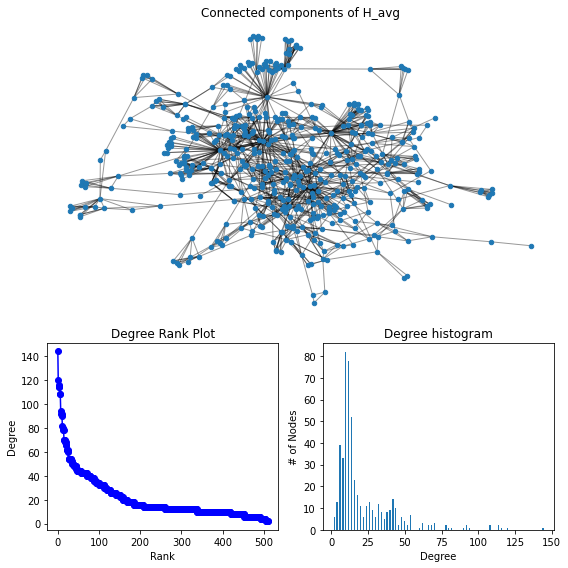

In [54]:
degree_sequence = sorted((d for n, d in H_avg.degree(weight="weight")), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of H_avg", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = H_avg.subgraph(sorted(nx.connected_components(H_avg), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of H_avg")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

Text(0, 0.5, 'Frequency')

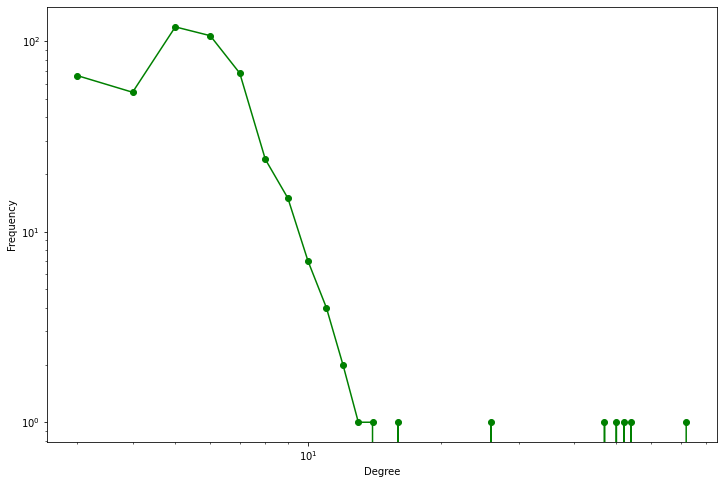

In [55]:
degree_freq = nx.degree_histogram(H_avg)
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(degrees[3:], degree_freq[3:],'go-') 
plt.xlabel('Degree')
plt.ylabel('Frequency')

that most nodes have degrees between 1 and 50. lower than pro player, This indicate that pro players play with more different players during their games.

Centrality

In [97]:
degree_centrality_dict_avg = dict(sorted(H_avg.degree(weight="weight"), key=lambda x: x[1], reverse=True))
degree_centrality_dict_avg

{'RNIXKeefHuGwElNgr5ix84yLiTDTAAG0vM4pEzriwK8G1lrtlOJ4e98BpWfYSXC1ufRhnPY9MIq-9w': 152,
 'P1_Ijm9F7MFfitF6k0xJMOZc3TY5P-LSVsm1qgnOoHiQLc54X_xduvruevhA7B1oyZ2O903ichxcJA': 142,
 'ATaIws30cj0UfWN179fxT95zfYUrAAWNPhJHRh6h8_IIYRdVl5tDqqVzQZnmdZM7To2bSiIkvy7FRA': 124,
 'MUHo2YOo2EfcqjTcwrgCkhhnYbSreWQsp9SaJPSEF4wssTUPK8WrlahBS20gS6PsybRX4J3lzISqBQ': 94,
 'nb-FzQonN7h4F57M76x6u60GbDv30oLn_dgnpdSTrbGAZG1IBzGOinbMNGmpiaLBxrX1gTvUaTDz0A': 94,
 'XKs6aLz6kv7yQ-pHODhnACnDH3T7c7y5zp_KKc3DF4oR_fBysQZUxciPKwv8Ad-hcjZMwHrn5NM1GQ': 92,
 'i2h30wJ6xd4A6o2l3-1UsfwkZPipTXSjaYVDNQHiM5CTmG_eK68C9PVJ_Jd3FREXgfuDxHbo27R8AQ': 90,
 'GotZB29OTYRC9tZkp48x90SMqLgF2x288dLUJwTwIjrasMLFRYrNSQC8zhMmzRe6RJ6OAzWGDe1zhA': 82,
 'OBwB1A9vg42apCghQ3dIMv-AGBoM93yEDdBBAAmfOB4EISQjmnHgp4IC2KHpciV5WkqngxBSrEiIJg': 78,
 'kzQ3qRyLm6wScpmxSZCLWjqZ7HgxMtt9L1uHfl8JcnymqFss86s1pRdIjCe_ltFBohlmbo_IG56uog': 74,
 'D7ocQZhs7cKnSlWhrfnUZlHlC_iaie2zmgBP58TVVaJz0A0Ehg9RztthIVdWIUWoeyc2ZDkxl3FMkA': 74,
 'mIvpUTCLHMv4B9jA-zX5BKTfGYZIKnVgrlz0Ft

The top three players with the most matching players in the average_player network graph are:
* RNIXKeefHuGwElNgr5ix84yLiTDTAAG0vM4pEzriwK8G1lrtlOJ4e98BpWfYSXC1ufRhnPY9MIq-9w': 152,
* 'P1_Ijm9F7MFfitF6k0xJMOZc3TY5P-LSVsm1qgnOoHiQLc54X_xduvruevhA7B1oyZ2O903ichxcJA': 142,
* ATaIws30cj0UfWN179fxT95zfYUrAAWNPhJHRh6h8_IIYRdVl5tDqqVzQZnmdZM7To2bSiIkvy7FRA': 124,

In [99]:
degree_centrality_normalized_avg = div_d(degree_centrality_dict_avg, H_avg)
degree_centrality_normalized_avg = dict(sorted(degree_centrality_normalized_avg.items(),key = lambda x:x[1],reverse = True))
degree_centrality_normalized_avg

{'RNIXKeefHuGwElNgr5ix84yLiTDTAAG0vM4pEzriwK8G1lrtlOJ4e98BpWfYSXC1ufRhnPY9MIq-9w': 0.0006128933404299931,
 'P1_Ijm9F7MFfitF6k0xJMOZc3TY5P-LSVsm1qgnOoHiQLc54X_xduvruevhA7B1oyZ2O903ichxcJA': 0.0005725714101385462,
 'ATaIws30cj0UfWN179fxT95zfYUrAAWNPhJHRh6h8_IIYRdVl5tDqqVzQZnmdZM7To2bSiIkvy7FRA': 0.0004999919356139417,
 'MUHo2YOo2EfcqjTcwrgCkhhnYbSreWQsp9SaJPSEF4wssTUPK8WrlahBS20gS6PsybRX4J3lzISqBQ': 0.000379026144739601,
 'nb-FzQonN7h4F57M76x6u60GbDv30oLn_dgnpdSTrbGAZG1IBzGOinbMNGmpiaLBxrX1gTvUaTDz0A': 0.000379026144739601,
 'XKs6aLz6kv7yQ-pHODhnACnDH3T7c7y5zp_KKc3DF4oR_fBysQZUxciPKwv8Ad-hcjZMwHrn5NM1GQ': 0.00037096175868131157,
 'i2h30wJ6xd4A6o2l3-1UsfwkZPipTXSjaYVDNQHiM5CTmG_eK68C9PVJ_Jd3FREXgfuDxHbo27R8AQ': 0.0003628973726230222,
 'GotZB29OTYRC9tZkp48x90SMqLgF2x288dLUJwTwIjrasMLFRYrNSQC8zhMmzRe6RJ6OAzWGDe1zhA': 0.00033063982838986466,
 'OBwB1A9vg42apCghQ3dIMv-AGBoM93yEDdBBAAmfOB4EISQjmnHgp4IC2KHpciV5WkqngxBSrEiIJg': 0.0003145110562732859,
 'kzQ3qRyLm6wScpmxSZCLWjqZ7HgxMtt9L1uHfl8Jcnym

In the ave_network the top three players who with a wide range of game friends (very connected individuals)are listed:
* RNIXKeefHuGwElNgr5ix84yLiTDTAAG0vM4pEzriwK8G1lrtlOJ4e98BpWfYSXC1ufRhnPY9MIq-9w': 0.0006128933404299931,
* 'P1_Ijm9F7MFfitF6k0xJMOZc3TY5P-LSVsm1qgnOoHiQLc54X_xduvruevhA7B1oyZ2O903ichxcJA': 0.0005725714101385462,
* 'ATaIws30cj0UfWN179fxT95zfYUrAAWNPhJHRh6h8_IIYRdVl5tDqqVzQZnmdZM7To2bSiIkvy7FRA': 0.0004999919356139417,

In [103]:
distance_dict = {(e1, e2): 1 / weight for e1, e2, weight in H_avg.edges(data='weight')}
nx.set_edge_attributes(H_avg, distance_dict, 'distance')

close_centrality = nx.closeness_centrality(H_avg, distance="distance")

dict2_sorted_values = sorted(close_centrality.items(),key = lambda x:x[1],reverse = True)
print(dict2_sorted_values)

[('RNIXKeefHuGwElNgr5ix84yLiTDTAAG0vM4pEzriwK8G1lrtlOJ4e98BpWfYSXC1ufRhnPY9MIq-9w', 0.7870527927811048), ('P1_Ijm9F7MFfitF6k0xJMOZc3TY5P-LSVsm1qgnOoHiQLc54X_xduvruevhA7B1oyZ2O903ichxcJA', 0.779747081918935), ('MUHo2YOo2EfcqjTcwrgCkhhnYbSreWQsp9SaJPSEF4wssTUPK8WrlahBS20gS6PsybRX4J3lzISqBQ', 0.7504926986456022), ('v09PsP8Foe-Ml2_0_4vQYq4zSl0FFQRxG3GrInb3AK0CmWh-NvBPN_lLSlCx-uONrXdgKf4oL8cn9Q', 0.7486820875499313), ('ATaIws30cj0UfWN179fxT95zfYUrAAWNPhJHRh6h8_IIYRdVl5tDqqVzQZnmdZM7To2bSiIkvy7FRA', 0.7456606996172134), ('FbnXlNkP6SlQQ6Zpd_kF-C0VQsM3UZs89L00taB2lqVQsjV1IPsBHEwW-57MzphbQUClcM1pG7ZumA', 0.7134782069446656), ('w9SCK5J4GtF5XGbSwOaw8tJIIAbzLPH4_XOBpWFDQOlJzY7OQmdL2h-BRDpKHW-hlIUhi79E37t5pQ', 0.6297208644484164), ('6xi8QE3xW95guOgLe1zdEKxGBvoBmk7b-HouDIcnCnRn4tk6iB6i187ZhgbGcPBAicjVHkVOUswosg', 0.6297208644484164), ('wNX7uLoEYZEMjZsMa266jHpZjc7JfqMdDgJgI2pwJwzOHIFnJkW7_zfFOwT5ULhSmhyMFOQcE8wOeQ', 0.6271590540951465), ('9BGQ7StCPvz0dWY3bG42W515i-lUctF0h-jKD4GyxJb-iwg6e8Mo97rOL-Brbk

In the avg_player network, the top 3 players who are good ‘broadcasters are listed:
* RNIXKeefHuGwElNgr5ix84yLiTDTAAG0vM4pEzriwK8G1lrtlOJ4e98BpWfYSXC1ufRhnPY9MIq-9w', 0.7870527927811048), 
* ('P1_Ijm9F7MFfitF6k0xJMOZc3TY5P-LSVsm1qgnOoHiQLc54X_xduvruevhA7B1oyZ2O903ichxcJA', 0.779747081918935), 
* ('MUHo2YOo2EfcqjTcwrgCkhhnYbSreWQsp9SaJPSEF4wssTUPK8WrlahBS20gS6PsybRX4J3lzISqBQ', 0.7504926986456022)

In [109]:
bet_centrality = nx.betweenness_centrality(H_avg, normalized = True, 
                                              endpoints = False, weight="weight") 

In [110]:
dict3_sorted_values = sorted(bet_centrality.items(),key = lambda x:x[1],reverse = True)
print(dict2_sorted_values)

[('RNIXKeefHuGwElNgr5ix84yLiTDTAAG0vM4pEzriwK8G1lrtlOJ4e98BpWfYSXC1ufRhnPY9MIq-9w', 0.7870527927811048), ('P1_Ijm9F7MFfitF6k0xJMOZc3TY5P-LSVsm1qgnOoHiQLc54X_xduvruevhA7B1oyZ2O903ichxcJA', 0.779747081918935), ('MUHo2YOo2EfcqjTcwrgCkhhnYbSreWQsp9SaJPSEF4wssTUPK8WrlahBS20gS6PsybRX4J3lzISqBQ', 0.7504926986456022), ('v09PsP8Foe-Ml2_0_4vQYq4zSl0FFQRxG3GrInb3AK0CmWh-NvBPN_lLSlCx-uONrXdgKf4oL8cn9Q', 0.7486820875499313), ('ATaIws30cj0UfWN179fxT95zfYUrAAWNPhJHRh6h8_IIYRdVl5tDqqVzQZnmdZM7To2bSiIkvy7FRA', 0.7456606996172134), ('FbnXlNkP6SlQQ6Zpd_kF-C0VQsM3UZs89L00taB2lqVQsjV1IPsBHEwW-57MzphbQUClcM1pG7ZumA', 0.7134782069446656), ('w9SCK5J4GtF5XGbSwOaw8tJIIAbzLPH4_XOBpWFDQOlJzY7OQmdL2h-BRDpKHW-hlIUhi79E37t5pQ', 0.6297208644484164), ('6xi8QE3xW95guOgLe1zdEKxGBvoBmk7b-HouDIcnCnRn4tk6iB6i187ZhgbGcPBAicjVHkVOUswosg', 0.6297208644484164), ('wNX7uLoEYZEMjZsMa266jHpZjc7JfqMdDgJgI2pwJwzOHIFnJkW7_zfFOwT5ULhSmhyMFOQcE8wOeQ', 0.6271590540951465), ('9BGQ7StCPvz0dWY3bG42W515i-lUctF0h-jKD4GyxJb-iwg6e8Mo97rOL-Brbk

In the pro_player network, the top 3 players who are ‘bridges’ between players are listed（betweenness_centrality）
* RNIXKeefHuGwElNgr5ix84yLiTDTAAG0vM4pEzriwK8G1lrtlOJ4e98BpWfYSXC1ufRhnPY9MIq-9w', 0.7870527927811048), 
* ('P1_Ijm9F7MFfitF6k0xJMOZc3TY5P-LSVsm1qgnOoHiQLc54X_xduvruevhA7B1oyZ2O903ichxcJA', 0.779747081918935), 
* ('MUHo2YOo2EfcqjTcwrgCkhhnYbSreWQsp9SaJPSEF4wssTUPK8WrlahBS20gS6PsybRX4J3lzISqBQ', 0.7504926986456022),

In [42]:
print("Density of the graph:", nx.density(H_avg))

Density of the graph: 0.011814794247128797


In [43]:
# Average Clustering for  graph
print(nx.average_clustering(H_avg))

0.6612319243314357


In our graph, the average clustering coefficient is 0.66 which is higher than the average clustering coefficient(0.19-random graph)->the graph has some community strcture

Diameter(maximum distance between any pair of nodes in the graph) and average distance

first finding out if Graph “is connected” (i.e. all one component) and, if not connected, finding the largest component and calculating diameter on that component alone

In [111]:
# If your Graph has more than one component, this will return False:
print(nx.is_connected(H_avg))
print(nx.diameter(H_avg))

# Next, use nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
#components = nx.connected_components(H_pro)
#largest_component = max(components, key=len)

# Create a "subgraph" of just the largest component
# Then calculate the diameter of the subgraph, just like you did with density.
#

#subgraph = .subgraph(largest_component)
#diameter = nx.diameter(subgraph)
#print("Network diameter of largest component:", diameter)

True
9


In [44]:
diameter_avg = nx.diameter(H_avg)
print("Network diameter of largest component:", diameter_avg)

Network diameter of largest component: 9


The network diameter of this network is 9: there is a path length of 8 between the two farthest-apart nodes in the network.

In [45]:
print('Average shortest connection between actors in largest component:', nx.average_shortest_path_length(H_avg, weight="weight"))

Average shortest connection between actors in largest component: 8.94220569653363


Transitivity is the ratio of all triangles over all possible triangles. A possible triangle exists when one player playes with two people. So transitivity, like density, expresses how interconnected a graph is in terms of a ratio of actual over possible connections.

In [46]:
triadic_closure_avg = nx.transitivity(H_avg)
print("Triadic closure:", triadic_closure_avg)

Triadic closure: 0.3511604439959637


# Community detection: 
Clauset-Newman-Moore Greedy Modularity Maximization, Girvan-Newman Community Detection, 
Lancichinetti–Fortunato–Radicchi, Cliques, K-Cores.

## Clauset-Newman-Moore Greedy Modularity Maximization

In [47]:
import networkx.algorithms.community as nxcom

%matplotlib inline
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
# get reproducible results
import random
from numpy import random as nprand
random.seed(123)
nprand.seed(123)

communities_pro = sorted(nxcom.greedy_modularity_communities(H_pro), key=len, reverse=True)
communities_avg = sorted(nxcom.greedy_modularity_communities(H_avg), key=len, reverse=True)

# Count the communities
print(f"The League of Legends pro players network has {len(communities_pro)} communities.")
print(f"The League of Legends average players network has {len(communities_avg)} communities.")

The League of Legends pro players network has 8 communities.
The League of Legends average players network has 21 communities.


In [48]:
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1

def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0
            
def get_color(i, r_off=1, g_off=1, b_off=1):
    '''Assign a color to a vertex.'''
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

In [49]:
# Set node and edge communities
set_node_community(H_pro, communities_pro)
set_edge_community(H_pro)
node_color = [get_color(H_pro.nodes[v]['community']) for v in H_pro.nodes]

set_node_community(H_avg, communities_avg)
set_edge_community(H_avg)
node_color = [get_color(H_avg.nodes[v]['community']) for v in H_avg.nodes]

# Set community color for edges between members of the same community (internal) and intra-community edges (external)
external_pro = [(v, w) for v, w in H_pro.edges if H_pro.edges[v, w]['community'] == 0]
internal_pro = [(v, w) for v, w in H_pro.edges if H_pro.edges[v, w]['community'] > 0]
internal_color_pro = ['black' for e in internal_pro]

external_avg = [(v, w) for v, w in H_avg.edges if H_avg.edges[v, w]['community'] == 0]
internal_avg = [(v, w) for v, w in H_avg.edges if H_avg.edges[v, w]['community'] > 0]
internal_color_avg = ['black' for e in internal_avg]

### Raw network
#### Pro players

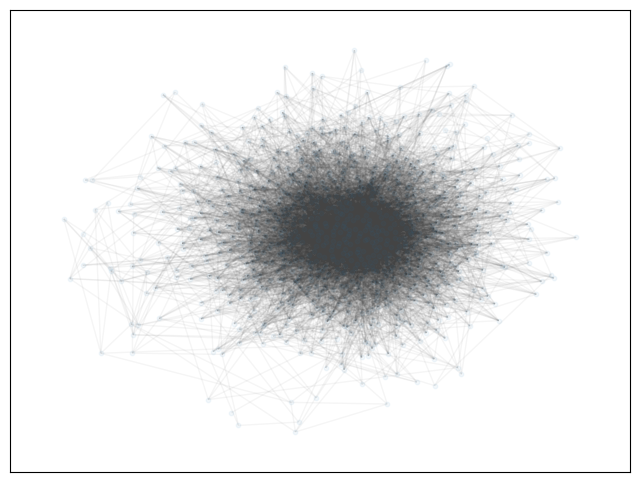

In [50]:
plt.style.use('default')
pos_pro = nx.spring_layout(H_pro, k=0.5)
plt.rcParams.update({'figure.figsize': (8, 6)})
nx.draw_networkx(
    H_pro,
    pos=pos_pro,
    node_size=10,
    edge_color="#444444",
    alpha=0.05,
    with_labels=False)

#### Average players

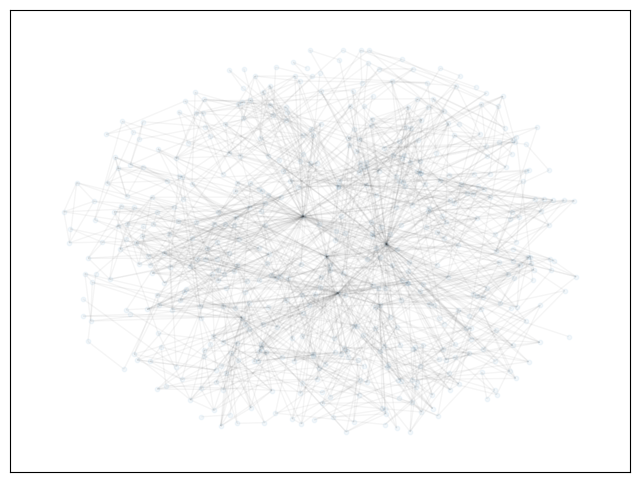

In [51]:
plt.style.use('default')
pos_avg = nx.spring_layout(H_avg, k=0.5)
plt.rcParams.update({'figure.figsize': (8, 6)})
nx.draw_networkx(
    H_avg,
    pos=pos_avg,
    node_size=10,
    edge_color="#444444",
    alpha=0.05,
    with_labels=False)

### Below we render these communities
#### Pro players

In [52]:
communities_pro = sorted(nxcom.greedy_modularity_communities(H_pro), key=len, reverse=True)
len(communities_pro)

8

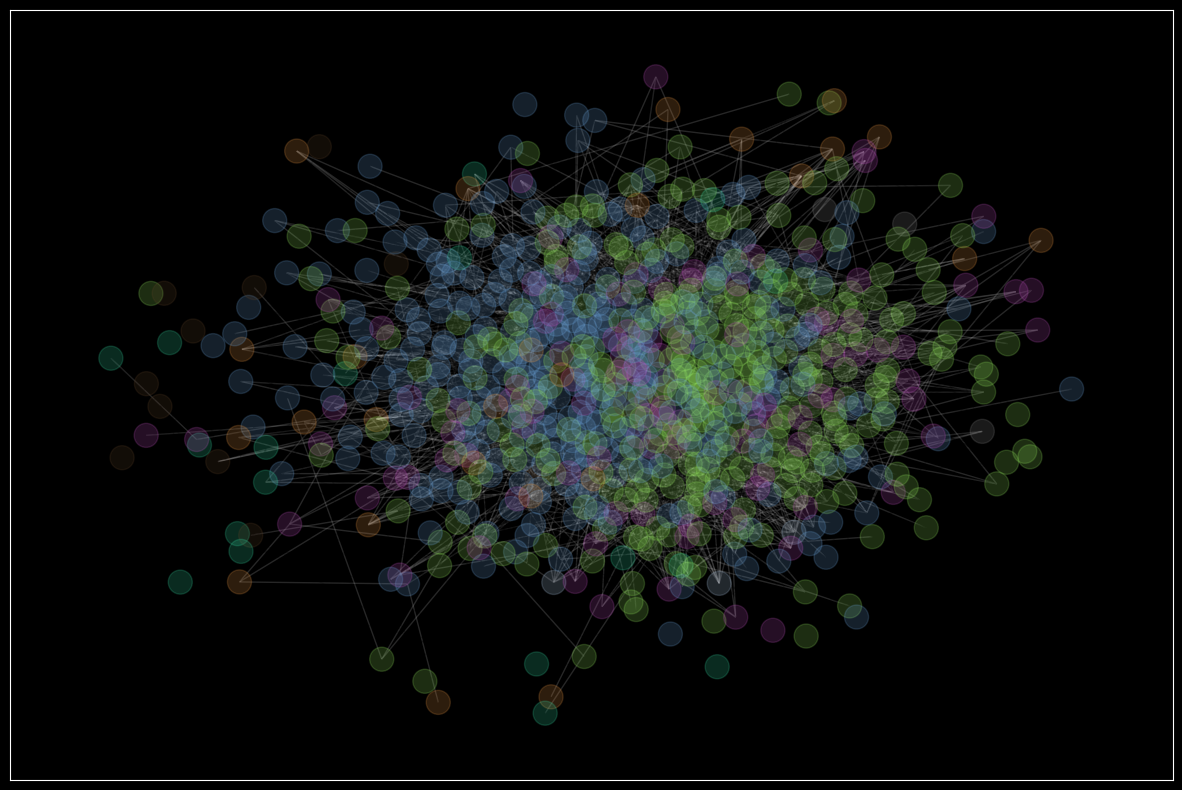

In [53]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
plt.style.use('dark_background')
# Set node and edge communities
set_node_community(H_pro, communities_pro)
set_edge_community(H_pro)
# Set community color for internal edges
external_pro = [(v, w) for v, w in H_pro.edges if H_pro.edges[v, w]['community'] == 0]
internal_pro = [(v, w) for v, w in H_pro.edges if H_pro.edges[v, w]['community'] > 0]
internal_color_pro = ['black' for e in internal_pro]
node_color = [get_color(H_pro.nodes[v]['community']) for v in H_pro.nodes]
# external edges
nx.draw_networkx(
    H_pro,
    pos=pos_pro,
    node_size=0,
    edgelist=external_pro,
    edge_color="silver",
    node_color=node_color,
    alpha=0.2,
    with_labels=False)
# internal edges
nx.draw_networkx(
    H_pro, pos=pos_pro,
    edgelist=internal_pro,
    edge_color=internal_color_pro,
    node_color=node_color,
    alpha=0.2,
    with_labels=False)

#### Average players

In [54]:
communities_avg = sorted(nxcom.greedy_modularity_communities(H_avg), key=len, reverse=True)
len(communities_avg)

21

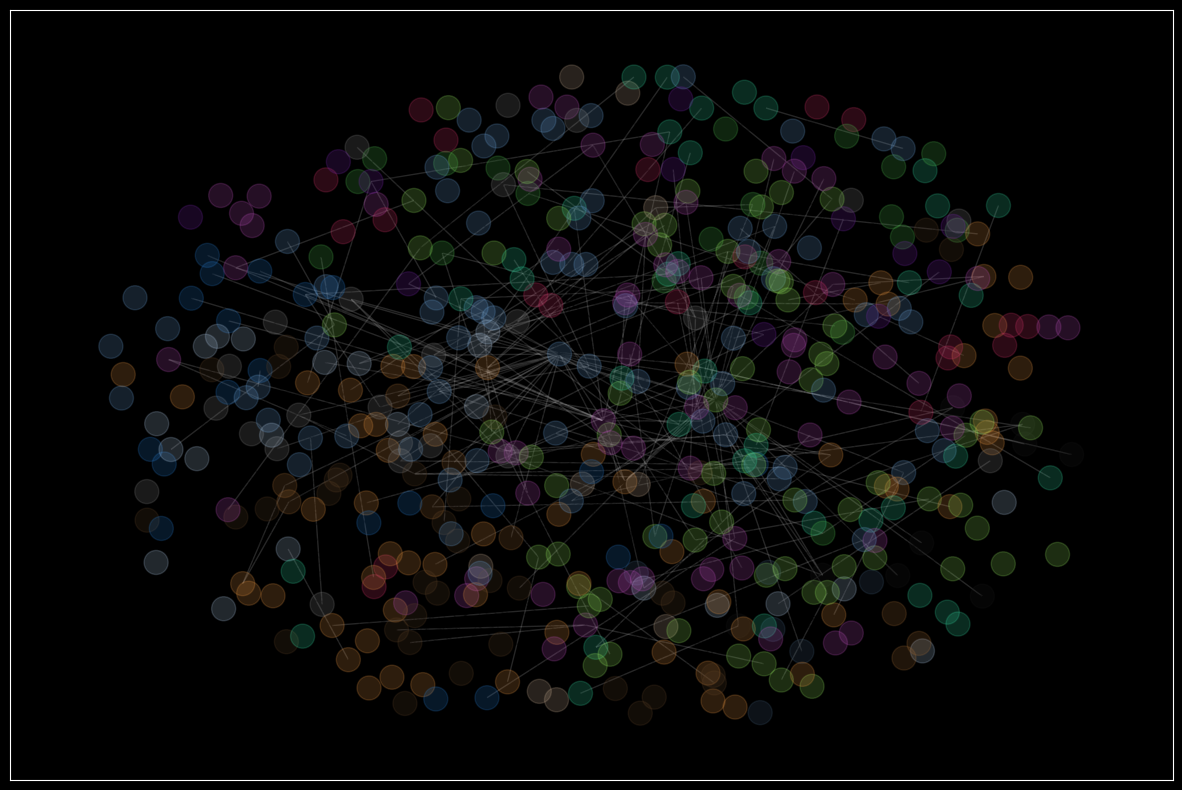

In [55]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
plt.style.use('dark_background')
# Set node and edge communities
set_node_community(H_avg, communities_avg)
set_edge_community(H_avg)
# Set community color for internal edges
external_avg = [(v, w) for v, w in H_avg.edges if H_avg.edges[v, w]['community'] == 0]
internal_avg = [(v, w) for v, w in H_avg.edges if H_avg.edges[v, w]['community'] > 0]
internal_color_avg = ['black' for e in internal_avg]
node_color = [get_color(H_avg.nodes[v]['community']) for v in H_avg.nodes]
# external edges
nx.draw_networkx(
    H_avg,
    pos=pos_avg,
    node_size=0,
    edgelist=external_avg,
    edge_color="silver",
    node_color=node_color,
    alpha=0.2,
    with_labels=False)
# internal edges
nx.draw_networkx(
    H_avg, pos=pos_avg,
    edgelist=internal_avg,
    edge_color=internal_color_avg,
    node_color=node_color,
    alpha=0.2,
    with_labels=False)

## K-CORES
#### Pro players

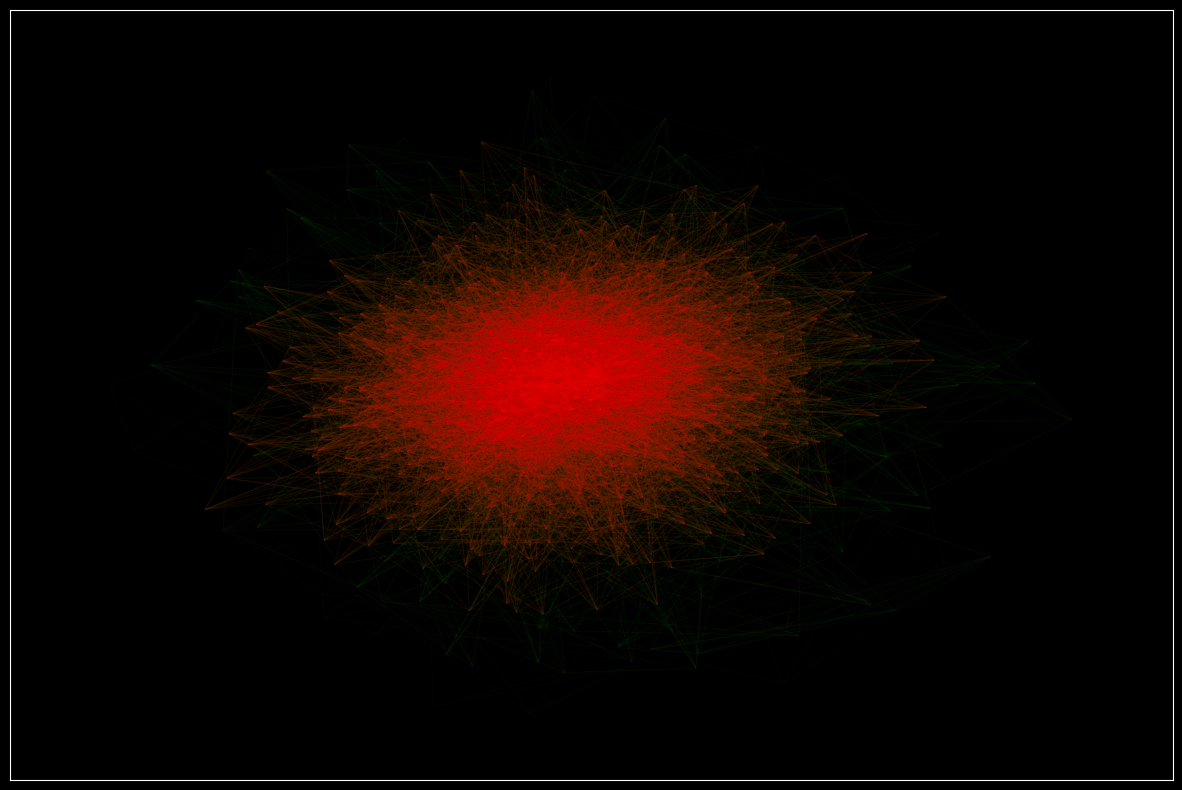

In [56]:
# cores with at lest degree 5
G_core_5 = nx.k_core(H_pro, 5)
# similarly, with at least degree 8
G_core_8 = nx.k_core(H_pro, 8)
# Visualize network and k-cores
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
plt.style.use('dark_background')
pos = nx.spring_layout(H_pro, k=0.5)
nx.draw_networkx(
    H_pro, pos=pos, node_size=0, edge_color="#333333", alpha=0.05, with_labels=False)
nx.draw_networkx(
    G_core_5, pos=pos, node_size=0, edge_color="green", alpha=0.05, with_labels=False)
nx.draw_networkx(
    G_core_8, pos=pos, node_size=0, edge_color="red", alpha=0.05, with_labels=False)

#### Average player

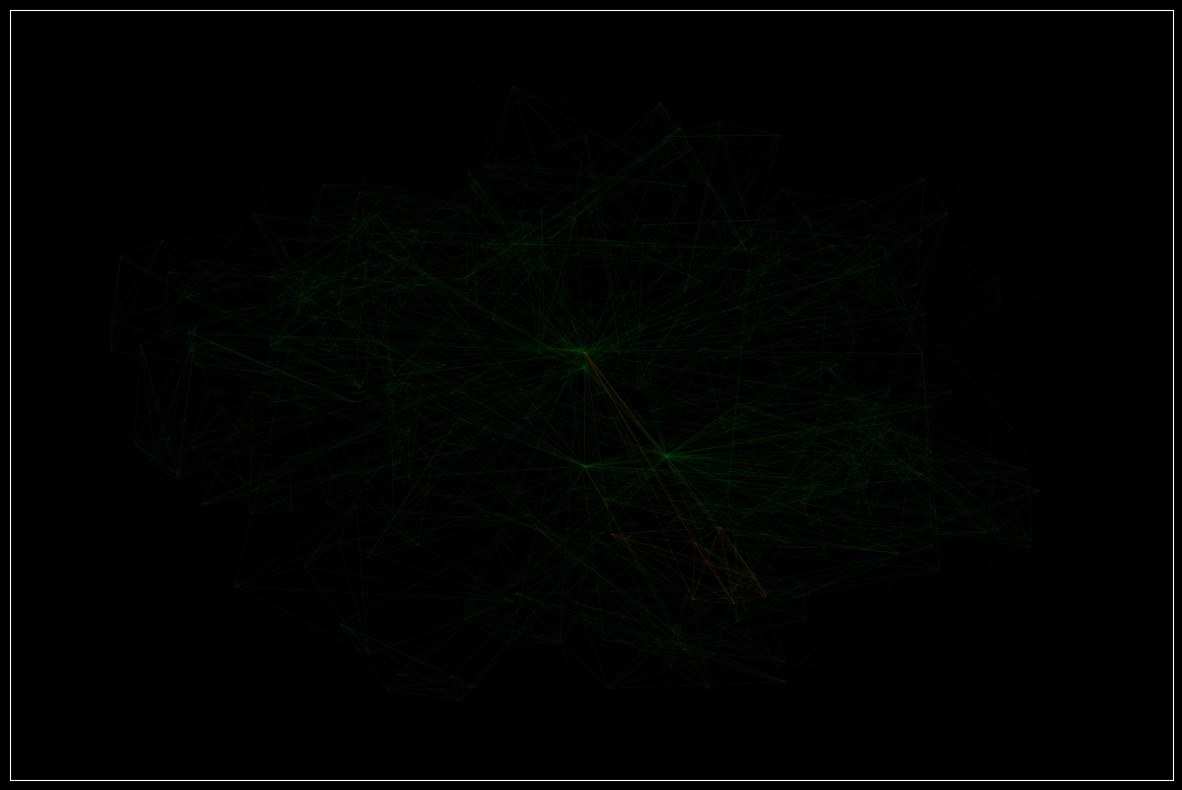

In [57]:
# cores with at lest degree 5
G_core_5 = nx.k_core(H_avg, 5)
# similarly, with at least degree 8
G_core_8 = nx.k_core(H_avg, 8)
# Visualize network and k-cores
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
plt.style.use('dark_background')
pos = nx.spring_layout(H_avg, k=0.5)
nx.draw_networkx(
    H_avg, pos=pos, node_size=0, edge_color="#333333", alpha=0.05, with_labels=False)
nx.draw_networkx(
    G_core_5, pos=pos, node_size=0, edge_color="green", alpha=0.05, with_labels=False)
nx.draw_networkx(
    G_core_8, pos=pos, node_size=0, edge_color="red", alpha=0.05, with_labels=False)

## GIRVAN-NEWMAN COMMUNITY DETECTION
The Girvan–Newman algorithm detects communities by progressively removing edges from the original network. The connected components of the remaining network are the communities. Instead of trying to construct a measure that tells us which edges are the most central to communities, the Girvan–Newman algorithm focuses on edges that are most likely “between” communities.
#### Pro players

This network has 2


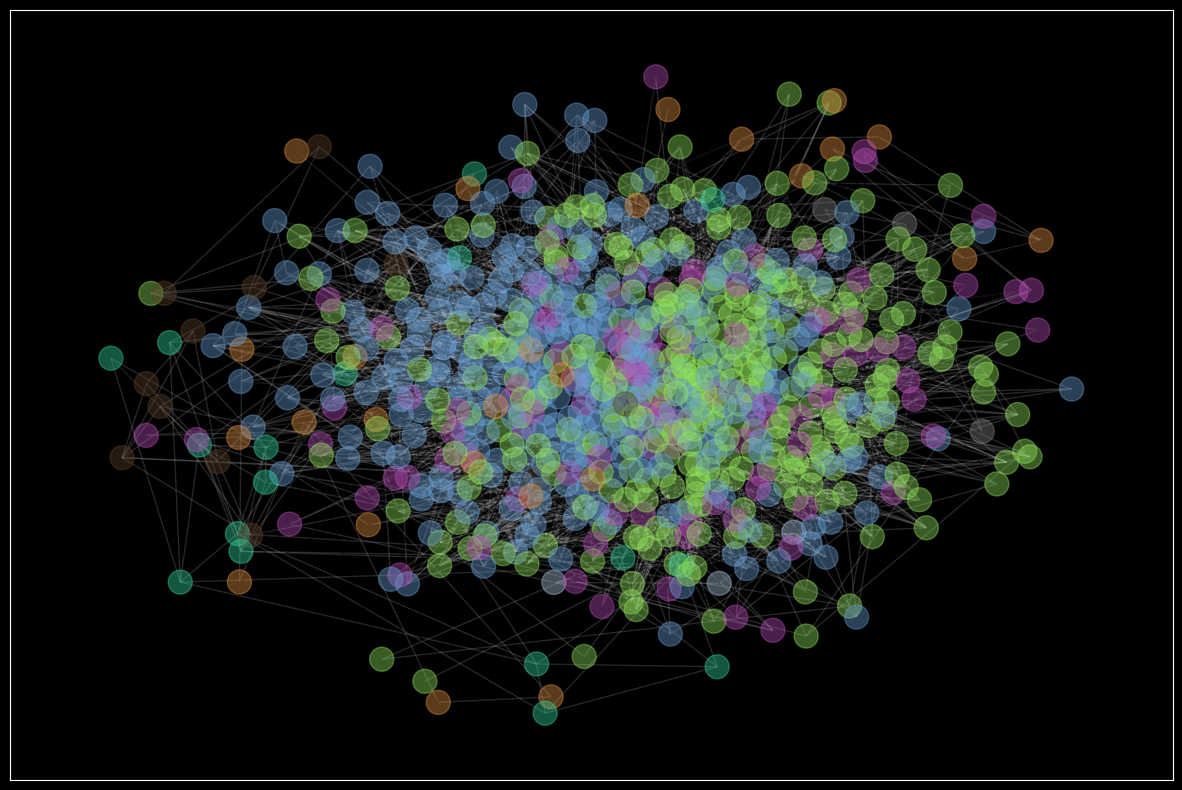

In [58]:
result = nxcom.girvan_newman(H_pro)
communities = next(result)
print(f'This network has {len(communities)}')

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
plt.style.use('dark_background')
# Set node and edge communities
set_node_community(H_pro, communities_pro)
set_edge_community(H_pro)
# Set community color for internal edges
internal = [(v, w) for v, w in H_pro.edges if H_pro.edges[v, w]['community'] == 0]
external = [(v, w) for v, w in H_pro.edges if H_pro.edges[v, w]['community'] > 0]
internal_color = ["black" for e in internal]
node_color = [get_color(H_pro.nodes[v]['community']) for v in H_pro.nodes]
# external edges
nx.draw_networkx(
    H_pro,
    pos=pos_pro,
    node_size=0,
    edgelist=external,
    edge_color="silver",
    node_color=node_color,
    alpha=0.2,
    with_labels=False)
# internal edges
nx.draw_networkx(
    H_pro, pos=pos_pro,
    edgelist=internal,
    edge_color=internal_color,
    node_color=node_color,
    alpha=0.4,
    with_labels=False)

#### Average players

This network has 2


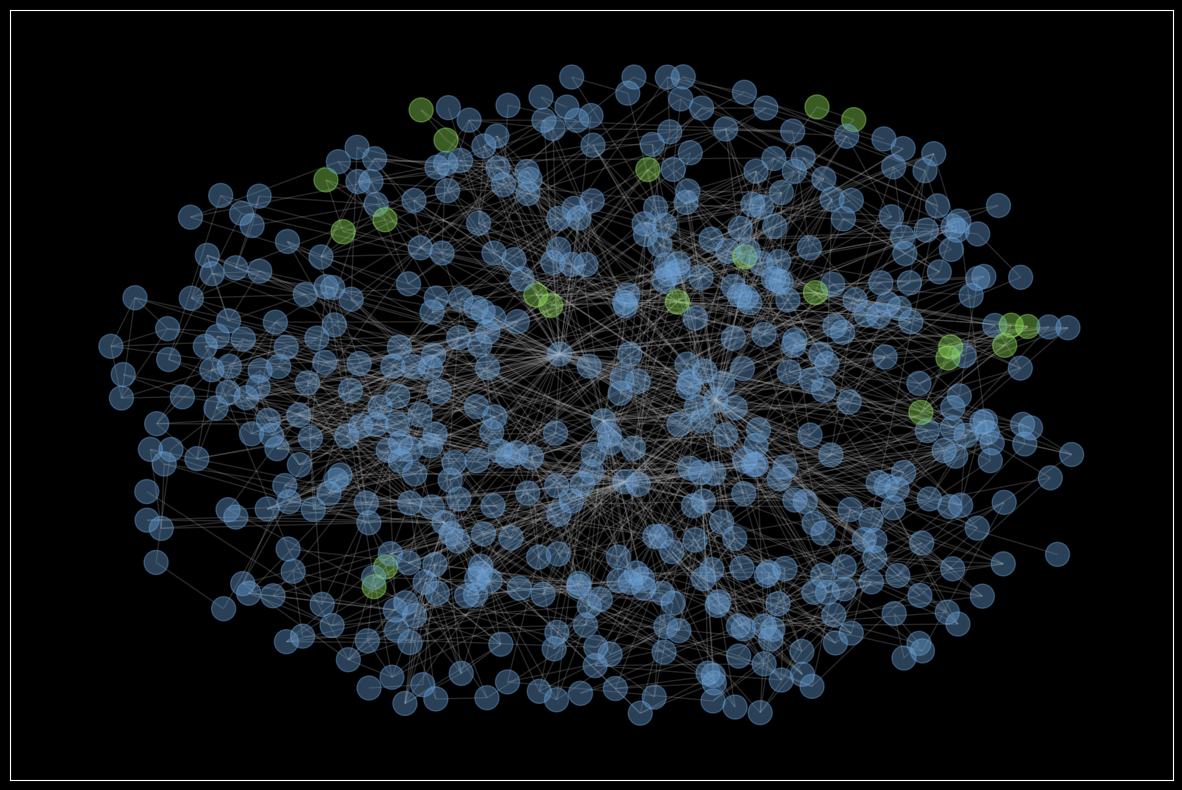

In [59]:
result = nxcom.girvan_newman(H_avg)
communities = next(result)
print(f'This network has {len(communities)}')

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
plt.style.use('dark_background')
# Set node and edge communities
set_node_community(H_avg, communities)
set_edge_community(H_avg)
# Set community color for internal edges
internal = [(v, w) for v, w in H_avg.edges if H_avg.edges[v, w]['community'] == 0]
external = [(v, w) for v, w in H_avg.edges if H_avg.edges[v, w]['community'] > 0]
internal_color = ["black" for e in internal]
node_color = [get_color(H_avg.nodes[v]['community']) for v in H_avg.nodes]
# external edges
nx.draw_networkx(
    H_avg,
    pos=pos_avg,
    node_size=0,
    edgelist=external,
    edge_color="silver",
    node_color=node_color,
    alpha=0.2,
    with_labels=False)
# internal edges
nx.draw_networkx(
    H_avg, pos=pos_avg,
    edgelist=internal,
    edge_color=internal_color,
    node_color=node_color,
    alpha=0.4,
    with_labels=False)

## CLIQUES
A clique is a subset of vertices of an undirected graph such that every two distinct vertices in the clique are adjacent; that is, its induced subgraph is complete. Cliques are in a way tight communities where every nodes is connected to every other.
#### Pro players

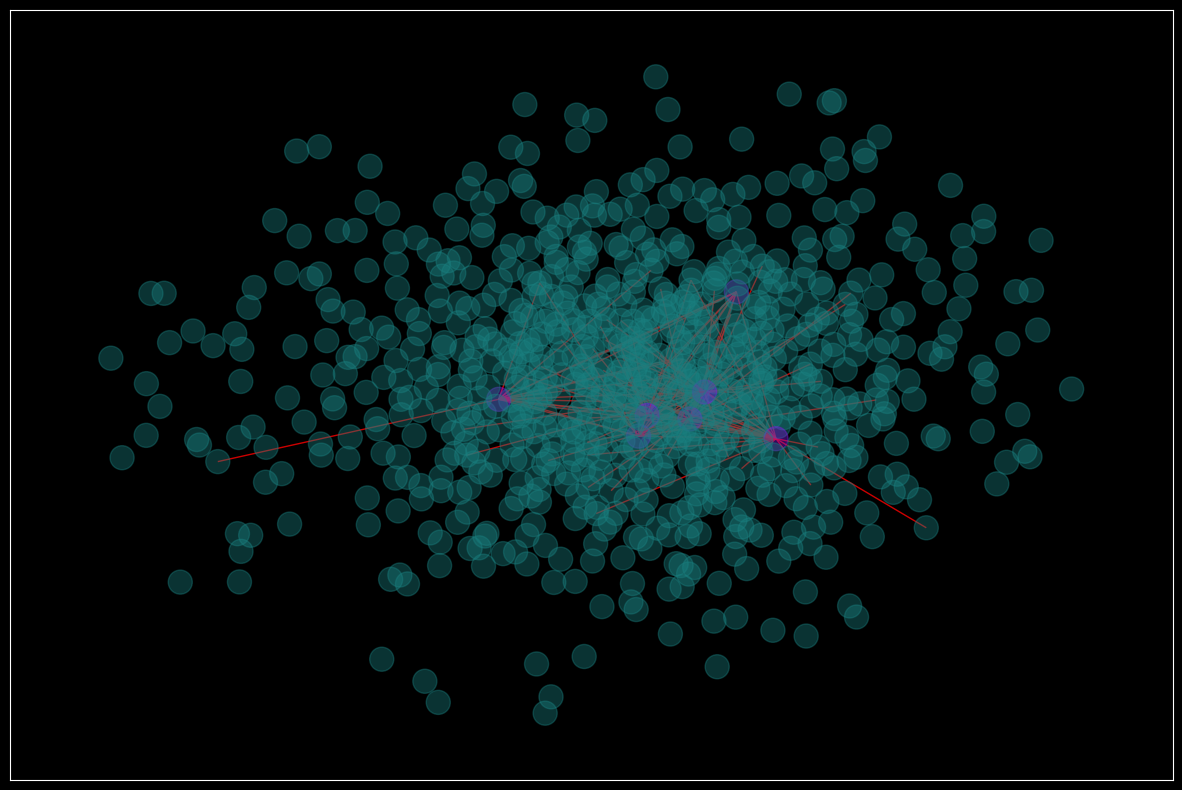

In [60]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
plt.style.use('dark_background')

cliques = list(nx.find_cliques(H_pro))
max_clique = max(cliques, key=len)
set_node_community(H_pro, cliques)
set_edge_community(H_pro)

internal = [(v, w) for v, w in H_pro.edges if H_pro.edges[v, w]['community'] == 0]
# external = [(v, w) for v, w in H_pro.edges if H_pro.edges[v, w]['community'] > 0]

# node_color = [get_color(H_pro.nodes[v]['community']) for v in new_G.nodes]
node_color = [(0.1, 0.5, 0.5) for v in H_pro.nodes()]


for i, v in enumerate(H_pro.nodes()):
    if v in max_clique:
        node_color[i] = (0.5, 0.1, 0.9)

external = []
for v, w in H_pro.edges:
    if v and w in max_clique:
        external.append((v, w))


# internal edges
nx.draw_networkx(
    H_pro, pos=pos_pro,
    edge_color=internal_color,
    node_color=node_color,
    alpha=0.4,
    with_labels=False)

# external edges
nx.draw_networkx(
    H_pro,
    pos=pos_pro,
    node_size=0,
    edgelist=external,
    edge_color="red",
    alpha=0.8,
    with_labels=False)

#### Average players

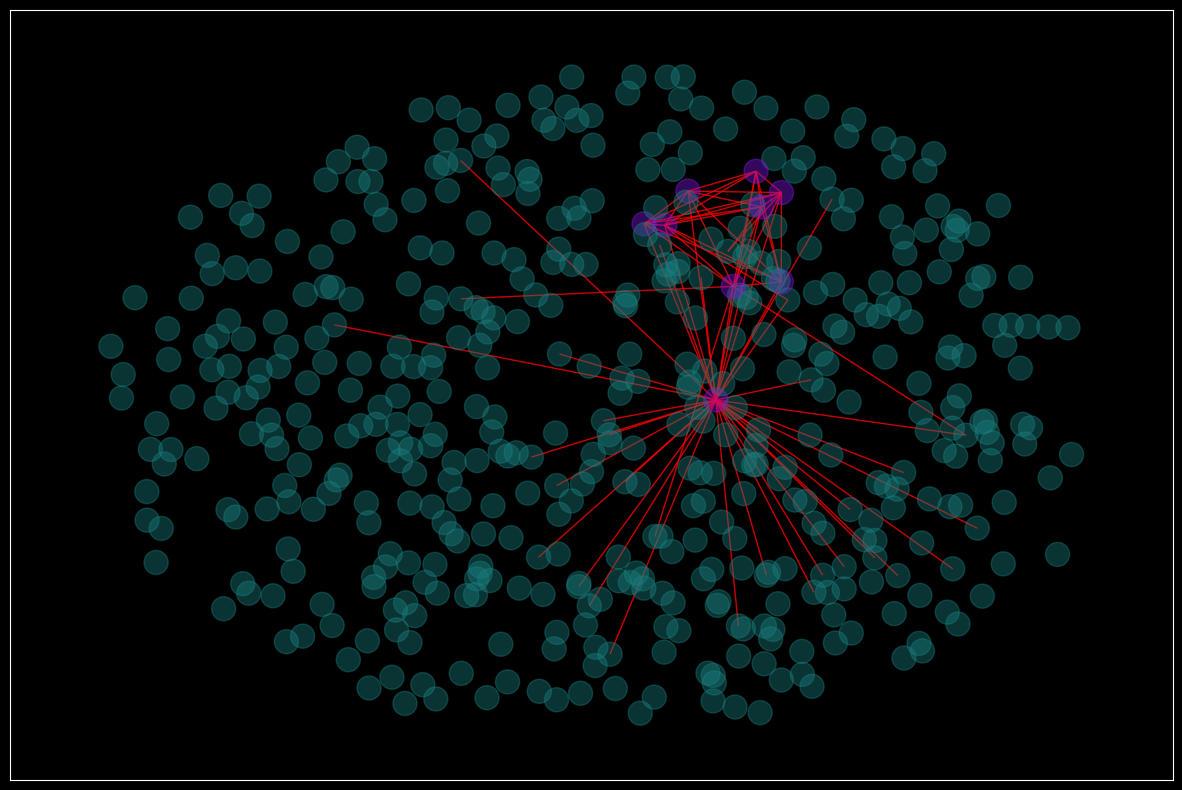

In [62]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
plt.style.use('dark_background')

cliques = list(nx.find_cliques(H_avg))
max_clique = max(cliques, key=len)
set_node_community(H_avg, cliques)
set_edge_community(H_avg)

internal = [(v, w) for v, w in H_avg.edges if H_avg.edges[v, w]['community'] == 0]
# external = [(v, w) for v, w in H_avg.edges if H_avg.edges[v, w]['community'] > 0]

# node_color = [get_color(H_avg.nodes[v]['community']) for v in H_avg.nodes]
node_color = [(0.1, 0.5, 0.5) for v in H_avg.nodes()]


for i, v in enumerate(H_avg.nodes()):
    if v in max_clique:
        node_color[i] = (0.5, 0.1, 0.9)

external = []
for v, w in H_avg.edges:
    if v and w in max_clique:
        external.append((v, w))


# internal edges
nx.draw_networkx(
    H_avg, pos=pos_avg,
    edge_color=internal_color,
    node_color=node_color,
    alpha=0.4,
    with_labels=False)

# external edges
nx.draw_networkx(
    H_avg,
    pos=pos_avg,
    node_size=0,
    edgelist=external,
    edge_color="red",
    alpha=0.8,
    with_labels=False)